In [1]:
%load_ext autoreload
%autoreload 2
%matplotlib inline
%config InlineBackend.figure_format = 'retina'

import os, math
import numpy as np, pandas as pd
import matplotlib.pyplot as plt, seaborn as sns
from pandas_summary import DataFrameSummary
from tqdm import tqdm, tqdm_notebook
from pathlib import Path
pd.set_option('display.max_columns', 1000)
pd.set_option('display.max_rows', 400)
sns.set()

os.chdir('../..')
from src import utils

In [2]:
DATA      = Path('data')
RAW       = DATA/'raw'
INTERIM   = DATA/'interim'
PROCESSED = DATA/'processed'

In [3]:
challenge  = pd.read_csv(RAW/'Challenge_20180423.csv', low_memory=False)
customer   = pd.read_csv(RAW/'Customer.csv', low_memory=False)
isin       = pd.read_csv(RAW/'Isin.csv', low_memory=False)
market     = pd.read_csv(RAW/'Market.csv', low_memory=False)
macro      = pd.read_csv(RAW/'MarketData_Macro.csv', low_memory=False)
submission = pd.read_csv(RAW/'sample_submission.csv', low_memory=False)
trade      = pd.read_csv(RAW/'Trade.csv', low_memory=False)

# Customer Table

In [4]:
customer.head()

,CustomerIdx,Sector,Subsector,Region,Country
0,2975,Banks and Intermediaries,Bank,Americas,BARBADOS
1,1594,Asset Managers & Hedge Funds,NaN,Americas,BERMUDA
2,399,Corporation,Corp - Comm. & Prof. Services,Americas,BERMUDA
3,836,Asset Owners,Insurance,Americas,BERMUDA
4,816,Asset Owners,Insurance,Americas,BERMUDA


In [8]:
customer.groupby('Region').count()

,CustomerIdx,Sector,Subsector,Country
Region,,,,
Americas,875,875,765,875
Asia Pacific,771,771,718,771
"Europe, Middle East and Africa",1825,1825,1636,1825


In [9]:
customer.groupby(['Region', 'Country']).count()

CustomerIdx  Sector  Subsector
Region                         Country                                       
Americas                       ARGENTINA                 5       5          5
                               BAHAMAS                   7       7          7
                               BARBADOS                  1       1          1
                               BERMUDA                   4       4          3
                               BRAZIL                   17      17         17
                               CANADA                   35      35         31
                               CAYMAN ISLANDS           43      43         39
                               CHILE                     8       8          7
                               COLOMBIA                  9       9          9
                               DOMINICAN REP             1       1          1
                               EL SALVADOR               1       1          1
                               MEXICO                   12      12         12
                               PANAMA                    3       3          2
                               PERU                      4       4          4
                               PUERTO RICO               1       1          1
                               URUGUAY                   8       8          5
                               USA                     715     715        619
                               VENEZUELA                 1       1          1
Asia Pacific                   AUSTRALIA                33      33         33
                               BRUNEI                    1       1          1
                               CHINA                   169     169        144
                               HONG KONG               220     220        201
                               INDIA                     4       4          4
                               INDONESIA                23      23         22
                               JAPAN                    77      77         77
                               KGDOM CAMBODIA            1       1          1
                               MACAU                     5       5          5
                               MALAYSIA                 17      17         17
                               NEW ZEALAND               2       2          1
                               PHILIPPINES              23      23         23
                               REP. OF KOREA            32      32         32
                               SINGAPORE               105     105         99
                               TAIWAN                   51      51         50
                               THAILAND                  7       7          7
                               VIET NAM                  1       1          1
Europe, Middle East and Africa ALGERIA                   1       1          1
                               ANDORRA                   3       3          3
                               ARMENIA                   1       1          1
                               AUSTRIA                  46      46         44
                               BAHREIN                   5       5          5
                               BELGIUM                  53      53         41
                               BULGARIA                  9       9          9
                               CAMEROON                  1       1          1
                               CROATIA                   5       5          5
                               CYPRUS                    4       4          4
                               CZECH REPUBLIC            8       8          8
                               DENMARK                  31      31         25
                               EGYPT                     2       2          2
                               ESTONIA                   4       4          4
                               FINLAND                  35      35   

In [10]:
customer.groupby('Sector').count()

,CustomerIdx,Subsector,Region,Country
Sector,,,,
Asset Managers & Hedge Funds,1497,1162,1497,1497
Asset Owners,334,329,334,334
Banks and Intermediaries,1437,1427,1437,1437
Corporation,64,64,64,64
Official Institution - OI,139,137,139,139


In [12]:
customer.groupby(['Sector', 'Subsector']).count()

CustomerIdx  \
Sector                       Subsector                                     
Asset Managers & Hedge Funds Asset Manager of Private Bank             7   
                             Asset Mgr owned by Bank/Insur.          354   
                             Hedge Fund                              444   
                             Independent Asset Manager               270   
                             Pension Fund                             74   
                             Private Equity                           12   
                             Real Estate                               1   
Asset Owners                 Family Office                             2   
                             Insurance                               324   
                             Sovereign Wealth Fund                     1   
                             Trust and Foundation                      2   
Banks and Intermediaries     Bank                                   1070   
                             Broker Dealer                           209   
                             Custodian Bank                            2   
                             Market Infrastructure                     2   
                             Private Bank - Wealth Manager            87   
                             Specialised Fin. Inst.                   57   
Corporation                  Corp - Agribusiness                       3   
                             Corp - Aviation                           1   
                             Corp - Chemicals                          3   
                             Corp - Comm. & Prof. Services            12   
                             Corp - Conglomerate                       1   
                             Corp - Cons. Durables, Apparel            1   
                             Corp - Consumer Staples                   1   
                             Corp - Energy                             4   
                             Corp - Food & Beverage                    2   
                             Corp - Healthcare                         1   
                             Corp - Metals & Mining                    3   
                             Corp - Others                            13   
                             Corp - Real Estate                        4   
                             Corp - Retailing                          3   
                             Corp - Shipping                           1   
                             Corp - Technology                         6   
                             Corp - Telecommunications                 5   
Official Institution - OI    OI - Central Banks                       81   
                             OI - Govt and States                     12   
                             OI - Local Authorities                    4   
                             OI - National Agencies                    2   
                             OI - Other Public Entities                6   
                             OI - Sovereign Wealth Funds              14   
                             OI - Supranationals                      18   

                                                             Region  Country  
Sector                       Subsector                                        
Asset Managers & Hedge Funds Asset Manager of Private Bank        7        7  
                             Asset Mgr owned by Bank/Insur.     354      354  
                             Hedge Fund                         444      444  
                             Independent Asset Manager          270      270  
                             Pension Fund                        74       74  
                             Private Equity                      12       12  
                             Real Estate                          1        1  
Asset Owners                 Family Office                        2        2  
  

In [13]:
customer.groupby(['Sector', 'Region']).count()

CustomerIdx  \
Sector                       Region                                        
Asset Managers & Hedge Funds Americas                                538   
                             Asia Pacific                            267   
                             Europe, Middle East and Africa          692   
Asset Owners                 Americas                                 65   
                             Asia Pacific                             63   
                             Europe, Middle East and Africa          206   
Banks and Intermediaries     Americas                                227   
                             Asia Pacific                            406   
                             Europe, Middle East and Africa          804   
Corporation                  Americas                                 17   
                             Asia Pacific                              6   
                             Europe, Middle East and Africa           41   
Official Institution - OI    Americas                                 28   
                             Asia Pacific                             29   
                             Europe, Middle East and Africa           82   

                                                             Subsector  \
Sector                       Region                                      
Asset Managers & Hedge Funds Americas                              435   
                             Asia Pacific                          218   
                             Europe, Middle East and Africa        509   
Asset Owners                 Americas                               63   
                             Asia Pacific                           63   
                             Europe, Middle East and Africa        203   
Banks and Intermediaries     Americas                              223   
                             Asia Pacific                          402   
                             Europe, Middle East and Africa        802   
Corporation                  Americas                               17   
                             Asia Pacific                            6   
                             Europe, Middle East and Africa         41   
Official Institution - OI    Americas                               27   
                             Asia Pacific                           29   
                             Europe, Middle East and Africa         81   

                                                             Country  
Sector                       Region                                   
Asset Managers & Hedge Funds Americas                            538  
                             Asia Pacific                        267  
                             Europe, Middle East and Africa      692  
Asset Owners                 Americas                             65  
                             Asia Pacific                         63  
                             Europe, Middle East and Africa      206  
Banks and Intermediaries     Americas                            227  
                             Asia Pacific                        406  
                             Europe, Middle East and Africa      804  
Corporation                  Americas                             17  
                             Asia Pacific                          6  
                             Europe, Middle East and Africa       41  
Official Institution - OI    Americas                             28  
                             Asia Pacific                         29  
                             Europe, Middle East and Africa       82

# Forex

Let's see the relacion between bonds that have a price in EUR with their Forex

In [14]:
# Checking macro table
macro.head()

,DateKey,SSE,DAX,EUROSTOXX,VSTOXX,FTSE100,HSI,NIKKEI,DOWJONES_INDU,SP500,VIX,FX_USD.ARS,FX_USD.AUD,FX_USD.BRL,FX_USD.CAD,FX_USD.CHF,FX_USD.CNO,FX_USD.CNY,FX_USD.EUR,FX_USD.GBP,FX_USD.HKD,FX_USD.IDR,FX_USD.JPY,FX_USD.NOK,FX_USD.SGD,FX_USD.TRY,FX_USD.ZAR,MoneyMarket_ARS3M,MoneyMarket_AUD3M,MoneyMarket_CAD3M,MoneyMarket_CHF3M,MoneyMarket_CNO3M,MoneyMarket_CNY3M,MoneyMarket_EUR3M,MoneyMarket_GBP3M,MoneyMarket_HKD3M,MoneyMarket_IDR3M,MoneyMarket_JPY3M,MoneyMarket_NOK3M,MoneyMarket_SGD3M,MoneyMarket_TRY3M,MoneyMarket_USD3M,MoneyMarket_ZAR3M,Swap_ARS10Y,Swap_ARS2Y,Swap_ARS5Y,Swap_AUD10Y,Swap_AUD2Y,Swap_AUD30Y,Swap_AUD5Y,Swap_BRL10Y,Swap_BRL2Y,Swap_BRL5Y,Swap_CAD10Y,Swap_CAD2Y,Swap_CAD30Y,Swap_CAD5Y,Swap_CHF10Y,Swap_CHF2Y,Swap_CHF30Y,Swap_CHF5Y,Swap_CNH10Y,Swap_CNH2Y,Swap_CNH30Y,Swap_CNH5Y,Swap_CNO10Y,Swap_CNO2Y,Swap_CNO30Y,Swap_CNO5Y,Swap_CNY10Y,Swap_CNY2Y,Swap_CNY30Y,Swap_CNY5Y,Swap_EUR10Y,Swap_EUR2Y,Swap_EUR30Y,Swap_EUR5Y,Swap_GBP10Y,Swap_GBP2Y,Swap_GBP30Y,Swap_GBP5Y,Swap_HKD10Y,Swap_HKD2Y,Swap_HKD30Y,Swap_HKD5Y,Swap_IDR10Y,Swap_IDR2Y,Swap_IDR30Y,Swap_IDR5Y,Swap_JPY10Y,Swap_JPY2Y,Swap_JPY30Y,Swap_JPY5Y,Swap_NOK10Y,Swap_NOK2Y,Swap_NOK30Y,Swap_NOK5Y,Swap_SGD10Y,Swap_SGD2Y,Swap_SGD30Y,Swap_SGD5Y,Swap_TRY10Y,Swap_TRY2Y,Swap_TRY5Y,Swap_USD10Y,Swap_USD2Y,Swap_USD30Y,Swap_USD5Y,Swap_ZAR10Y,Swap_ZAR2Y,Swap_ZAR30Y,Swap_ZAR5Y
0,20150101,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,19.20,0.116959,0.81620,0.377658,0.861030,1.006264,0.161512,0.163399,1.2101,1.55775,0.128941,0.000081,0.008341,0.133451,0.756287,0.428964,0.086457,35.230452,2.724540,1.303309,-0.063143,3.701588,3.617925,0.077487,0.561227,0.381829,7.17183,0.112078,1.459648,0.709986,10.001685,0.256570,6.130798,19.989643,29.980614,21.985733,3.041150,2.398950,3.625076,2.558248,NaN,NaN,NaN,2.277279,NaN,2.760043,1.775859,0.409878,NaN,1.082563,-0.046046,3.749868,3.418686,NaN,3.549519,3.750081,3.419989,NaN,3.550031,3.439794,3.218679,NaN,3.239508,0.697389,NaN,1.408397,0.233572,NaN,NaN,NaN,NaN,2.252274,0.95467,NaN,1.814259,8.955845,8.368177,9.552123,8.708471,0.444559,NaN,1.233032,0.180984,1.806932,NaN,2.179804,1.295793,NaN,NaN,NaN,NaN,9.885583,10.069276,9.915120,2.295037,NaN,2.712112,1.774452,7.963276,6.856526,8.331874,7.403867
1,20150102,NaN,9764.73,3139.44,26.2531,6547.80,23857.82,NaN,17832.99,2058.20,17.79,0.116891,0.81140,0.371292,0.851136,0.998851,0.161186,0.163292,1.2008,1.53340,0.128934,0.000080,0.008308,0.131841,0.752757,0.427241,0.085609,33.000000,2.736281,1.302850,-0.063000,3.701588,3.617925,0.077179,0.563380,0.385000,7.10000,0.112078,1.490000,0.790000,10.020000,0.255218,6.125000,20.000000,30.000000,22.000000,3.108394,2.452905,3.692179,2.625847,11.767860,12.807338,12.202677,2.231223,1.445105,2.716551,1.748069,0.367391,NaN,1.040147,-0.058452,3.750081,3.419989,NaN,3.550031,3.750081,3.419989,NaN,3.550031,3.439794,3.218679,NaN,3.239508,0.640191,0.062120,1.347191,0.211268,1.674890,0.810358,2.109754,1.305976,2.290000,0.97500,2.751960,1.840000,8.950000,8.350000,9.550000,8.700000,0.444559,NaN,1.233032,0.180984,1.794443,1.100220,2.168744,1.280511,2.447394,1.132505,2.951900,1.948474,9.946260,10.151881,9.976101,2.236910,0.893242,2.647499,1.746344,7.940000,6.840000,8.310000,7.390000
2,20150105,3350.519,9473.16,3023.14,29.6236,6417.16,23721.32,17408.71,17501.65,2020.58,19.92,0.116782,0.80905,0.366757,0.850268,0.993764,0.160822,0.163265,1.1939,1.52555,0.128926,0.000079,0.008366,0.131277,0.749260,0.429304,0.085426,32.000000,2.742523,1.303171,-0.063000,3.749732,3.691439,0.075252,0.563380,0.383570,7.10000,0.112140,1.450000,0.875000,9.993400,0.254194,6.125000,20.000000,30.000000,22.000000,3.007227,2.423082,3.591836,2.566016,11.809585,12.736379,12.154331,2.180266,1.420899,2.668708,1.713829,0.350011,-0.263049,0.981356,-0.069792,3.700010,3.405070,NaN,3.500016,3.700010,3.405070,NaN,3.500016,3.450010,3.230070,NaN,3.250016,0.658914,0.063256,1.351414,0.220293,1.613752,0.799833,2.043961,1.251222,2.190000,0.94000,2.652800,1.750000,8.950000,8.350000,9.550000,8.700000,0.436972,0.112315,1.225011,0.178599,1.747772,1.06362

- We take a bond that have a currency equal EUR

In [23]:
isin.loc[isin['Currency'] == 'EUR'].head(3)

,IsinIdx,TickerIdx,ActualMaturityDateKey,IssueDateKey,Seniority,Currency,ActivityGroup,Region,Activity,RiskCaptain,Owner,CompositeRating,IndustrySector,IndustrySubgroup,MarketIssue,IssuedAmount,CouponType
65,65,3367,20170112,20050112,SUB,EUR,FLOW G10,EUROPE,INSTITUTIONAL MARKET MAKING,FINANCIALS,INSCO CASH,NR,Financial,Multi-line Insurance,Euro-zone,180000000.0,VARIABLE
66,66,3367,20170112,20050112,SUB,EUR,FLOW G10,EUROPE,INSTITUTIONAL MARKET MAKING,FINANCIALS,INSCO CASH,NR,Financial,Multi-line Insurance,Euro-zone,120000000.0,VARIABLE
67,67,3367,20180912,20080612,SUB,EUR,FLOW G10,EUROPE,INSTITUTIONAL MARKET MAKING,FINANCIALS,INSCO CASH,NR,Financial,Multi-line Insurance,Euro mtn,500000000.0,VARIABLE


In [26]:
trade_idx_65 = trade.loc[trade['IsinIdx'] == 65]

- we check if all the dates of bonds transactions are present in macro table

In [16]:
# Verifying max and min date in data
macro.DateKey.min(), macro.DateKey.max()

(20150101, 20180511)

In [18]:
trade.TradeDateKey.min(), trade.TradeDateKey.max()

(20160101, 20180422)

In [20]:
trade.TradeDateKey.isin(macro.DateKey).all()

False

- We will make a marge between trade and macro 

In [103]:
macro_eur_2016 = macro.loc[macro['DateKey'].astype(str).str[:4] >= '2016']
macro_eur_2016.head()

,DateKey,SSE,DAX,EUROSTOXX,VSTOXX,FTSE100,HSI,NIKKEI,DOWJONES_INDU,SP500,VIX,FX_USD.ARS,FX_USD.AUD,FX_USD.BRL,FX_USD.CAD,FX_USD.CHF,FX_USD.CNO,FX_USD.CNY,FX_USD.EUR,FX_USD.GBP,FX_USD.HKD,FX_USD.IDR,FX_USD.JPY,FX_USD.NOK,FX_USD.SGD,FX_USD.TRY,FX_USD.ZAR,MoneyMarket_ARS3M,MoneyMarket_AUD3M,MoneyMarket_CAD3M,MoneyMarket_CHF3M,MoneyMarket_CNO3M,MoneyMarket_CNY3M,MoneyMarket_EUR3M,MoneyMarket_GBP3M,MoneyMarket_HKD3M,MoneyMarket_IDR3M,MoneyMarket_JPY3M,MoneyMarket_NOK3M,MoneyMarket_SGD3M,MoneyMarket_TRY3M,MoneyMarket_USD3M,MoneyMarket_ZAR3M,Swap_ARS10Y,Swap_ARS2Y,Swap_ARS5Y,Swap_AUD10Y,Swap_AUD2Y,Swap_AUD30Y,Swap_AUD5Y,Swap_BRL10Y,Swap_BRL2Y,Swap_BRL5Y,Swap_CAD10Y,Swap_CAD2Y,Swap_CAD30Y,Swap_CAD5Y,Swap_CHF10Y,Swap_CHF2Y,Swap_CHF30Y,Swap_CHF5Y,Swap_CNH10Y,Swap_CNH2Y,Swap_CNH30Y,Swap_CNH5Y,Swap_CNO10Y,Swap_CNO2Y,Swap_CNO30Y,Swap_CNO5Y,Swap_CNY10Y,Swap_CNY2Y,Swap_CNY30Y,Swap_CNY5Y,Swap_EUR10Y,Swap_EUR2Y,Swap_EUR30Y,Swap_EUR5Y,Swap_GBP10Y,Swap_GBP2Y,Swap_GBP30Y,Swap_GBP5Y,Swap_HKD10Y,Swap_HKD2Y,Swap_HKD30Y,Swap_HKD5Y,Swap_IDR10Y,Swap_IDR2Y,Swap_IDR30Y,Swap_IDR5Y,Swap_JPY10Y,Swap_JPY2Y,Swap_JPY30Y,Swap_JPY5Y,Swap_NOK10Y,Swap_NOK2Y,Swap_NOK30Y,Swap_NOK5Y,Swap_SGD10Y,Swap_SGD2Y,Swap_SGD30Y,Swap_SGD5Y,Swap_TRY10Y,Swap_TRY2Y,Swap_TRY5Y,Swap_USD10Y,Swap_USD2Y,Swap_USD30Y,Swap_USD5Y,Swap_ZAR10Y,Swap_ZAR2Y,Swap_ZAR30Y,Swap_ZAR5Y
261,20160101,3417.720,10436.63,3216.14,25.390167,6167.875,21620.76,18645.223333,17286.985,2028.30,18.21,0.076760,0.72940,0.252073,0.723380,1.000625,0.154012,0.154012,1.0871,1.47375,0.129027,0.000073,0.008321,0.112895,0.708215,0.342436,0.064255,36.652652,2.324601,0.864493,-0.755957,2.341726,2.288185,-0.132223,0.587081,0.396958,8.81667,0.077086,1.13,1.8230,11.689,0.606008,6.625,19.986769,35.475537,22.970779,2.990338,2.176640,3.451547,2.488269,16.312158,16.466583,16.446536,1.898236,0.839248,2.518353,1.199530,0.067553,-0.777918,0.777678,-0.482952,2.930149,2.329939,3.130095,2.63038,2.930148,2.32994,3.130095,2.630379,2.580062,2.179789,2.795579,2.350151,0.893176,-0.155009,1.557676,0.211944,1.847768,0.951213,2.074200,1.433308,1.907778,1.004339,2.271730,1.529979,8.950366,8.353634,9.549357,8.700232,0.373594,0.075410,1.185850,0.129203,1.792426,0.793714,2.115717,1.177213,3.027579,2.035953,3.341191,2.587084,11.716692,12.129954,11.917806,2.186168,1.162792,2.611870,1.728990,9.361842,8.09305,9.4088,8.889919
262,20160104,3296.258,10283.44,3164.76,26.998000,6093.430,21327.12,18450.980000,17148.940,2012.66,20.70,0.075758,0.71825,0.246731,0.716769,0.997730,0.153186,0.153186,1.0828,1.47105,0.129019,0.000072,0.008383,0.112455,0.703581,0.336638,0.063824,36.750000,2.318397,0.872932,-0.756000,2.375000,2.304586,-0.131873,0.591250,0.395217,8.85667,0.082852,1.12,1.8075,11.568,0.598148,6.625,20.000000,35.500000,23.000000,2.922995,2.154049,3.386975,2.434382,16.261833,16.452371,16.425803,1.875605,0.833717,2.482685,1.180654,0.010566,-0.786223,0.732558,-0.525844,2.900000,2.340000,3.100000,2.60000,2.915000,2.34500,3.115000,2.615000,2.610000,2.190000,2.825355,2.380000,0.829561,-0.161633,1.499561,0.177975,1.797681,0.928868,2.030800,1.390655,1.865000,0.970000,2.231300,1.470000,8.950000,8.350000,9.550000,8.700000,0.368926,0.076269,1.177199,0.127819,1.737541,0.782990,2.061172,1.129475,3.032562,2.049710,3.346000,2.596278,11.823023,12.224771,12.013825,2.168271,1.153903,2.599517,1.706561,9.405000,8.11500,9.4650,8.925000
263,20160105,3287.710,10310.10,3178.01,26.208700,6137.240,21188.72,18374.000000,17158.660,2016.71,19.34,0.073314,0.71515,0.249358,0.714720,0.991424,0.153315,0.153327,1.0743,1.46640,0.129016,0.000072,0.008405,0.112170,0.702815,0.335638,0.064062,27.000000,2.319231,0.865632,-0.754000,2.375000,2.324758,-0.132866,0.589380,0.395148,8.69000,0.082875,1.13,1.7900,11.550,0.610271,6.633,20.000000,35.500000,23.000000,2.910228,2.161480,3.384452,2.434604,15.911735,16.148811,16.094588,1.843296,0.810397,2.475756,1.161874,-0.017719,-0.806953,0.707317,-0.554508,2.925000,2.345000,3.125000,2.62500,2.925000,2.34500,3.125000,2.625000,2.655000,2.210000,2.869984,2.4250

In [104]:
trade.head()

,TradeDateKey,CustomerIdx,IsinIdx,BuySell,NotionalEUR,Price,TradeStatus,CustomerInterest
0,20161207,2789,8478,Sell,653168.0,0.0,Unknown,1.0
1,20170329,2574,14562,Buy,1656487.0,0.0,Unknown,1.0
2,20170418,2574,4747,Buy,939673.0,0.0,Unknown,1.0
3,20170310,2574,9885,Sell,708082.0,0.0,Unknown,1.0
4,20161116,2574,8885,Buy,1147709.0,0.0,Unknown,1.0


In [105]:
trade_customer = pd.merge(trade, customer, how='left', on='CustomerIdx')
trade_customer_europe = trade_customer.loc[trade_customer['Region'] == 'Europe, Middle East and Africa'].reset_index()
del trade_customer_europe['index']
print('total trades: ' , trade_customer.shape[0])
print('total eropean trades: ', trade_customer_europe.shape[0])

total trades:  6762021
total eropean trades:  4121377


In [106]:
# Verifying if all dates are present in macros 
trade_customer_europe.TradeDateKey.isin(macro_eur_2016.DateKey).all()

False

In [108]:
trader = trade_customer_europe.groupby(['TradeDateKey', 'BuySell']).count().reset_index()
trader_buy = trader.loc[trader['BuySell'] == 'Buy']
trader_sell = trader.loc[trader['BuySell'] == 'Sell']
trader_buy = pd.merge(trade_customer_europe.groupby(['TradeDateKey']).count().reset_index(), trader_buy, how='left', on='TradeDateKey')
trader_sell = pd.merge(trade_customer_europe.groupby(['TradeDateKey']).count().reset_index(), trader_sell, how='left', on='TradeDateKey')

In [87]:
trader_buy_eur_2016 = pd.merge(trader_buy, macro_eur_2016, how='left', left_on=['TradeDateKey'], right_on=['DateKey'])
trader_sell_eur_2016 = pd.merge(trader_sell, macro_eur_2016, how='left', left_on=['TradeDateKey'], right_on=['DateKey'])
del trader_buy_eur_2016['DateKey']
del trader_sell_eur_2016['DateKey']
# trader_buy_eur_2016.TradeDateKey = pd.to_numeric(trader_buy_eur_2016.TradeDateKey, errors='coerce')
# trader_sell_eur_2016.TradeDateKey = pd.to_numeric(trader_sell_eur_2016.TradeDateKey, errors='coerce')

In [124]:
buy_sell_eur_2016 = pd.concat([trader_buy_eur_2016.CustomerIdx_y, trader_sell_eur_2016.CustomerIdx_y], join='inner', axis=1, keys=['buy_count', 'sell_count'])
buy_sell_eur_2016.buy_count = pd.to_numeric(buy_sell_eur_2016.buy_count, errors='coerce')
buy_sell_eur_2016.sell_count = pd.to_numeric(buy_sell_eur_2016.sell_count, errors='coerce')

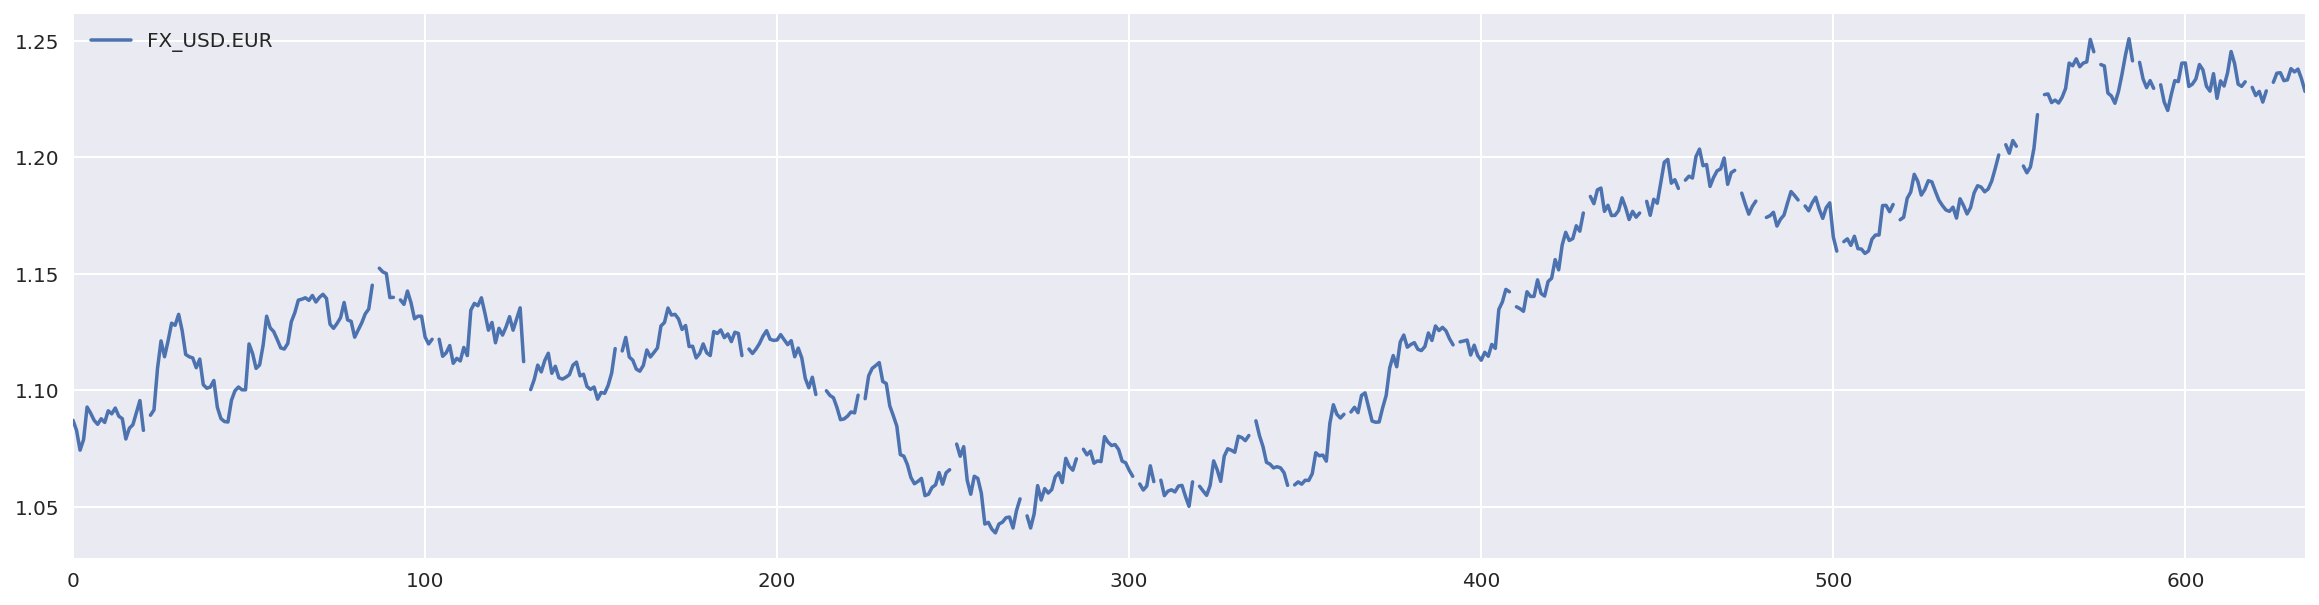

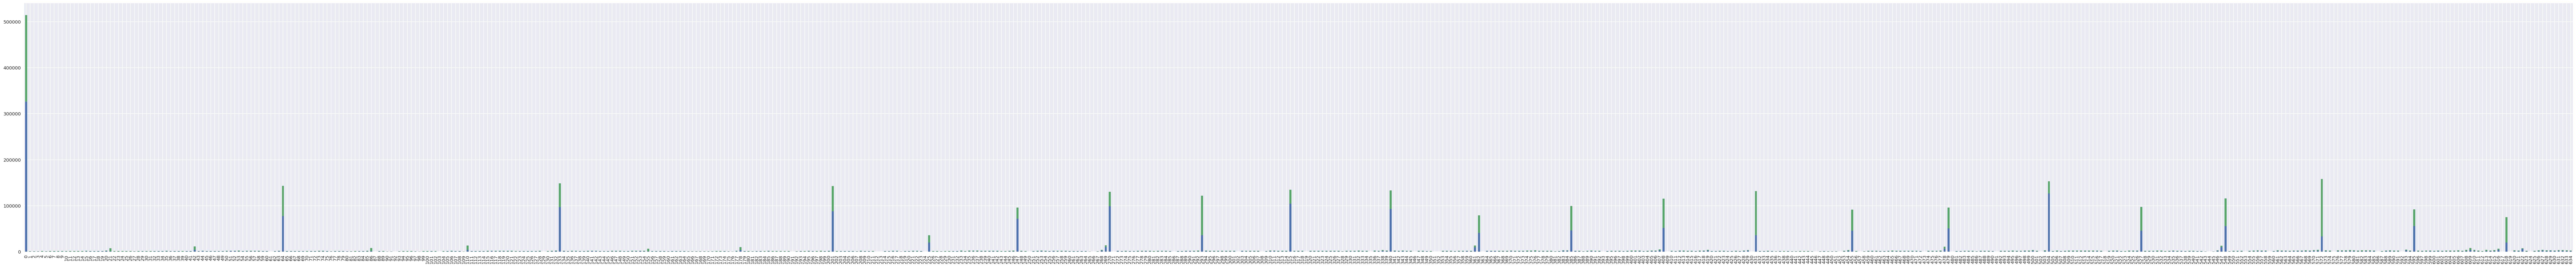

In [142]:
import seaborn as sns
sns.set()
trader_buy_eur_2016.plot(y=['FX_USD.EUR'], figsize=(20,5))
buy_sell_eur_2016.plot(kind='bar', stacked=True, legend=False, figsize=(100,10))
plt.show()

In [129]:
trade_customer_europe.groupby(['TradeDateKey']).count().reset_index().shape

(635, 12)

In [ ]:
trader_buy_done.head()

In [144]:
market.head()

,IsinIdx,DateKey,Price,Yield,ZSpread
0,1,20160101,104.250,7.835,5.505
1,7,20160101,107.500,7.520,5.541
2,102,20160101,100.746,4.048,2.085
3,331,20160101,112.790,-0.752,-0.215
4,345,20160101,113.383,-0.667,-0.272


# Market

In [448]:
trade_idx_1 = trade.loc[trade['IsinIdx'] == 1].reset_index()
del trade_idx_1['index']
print('total trades: ' , trade_idx_1.shape[0])

total trades:  595


In [449]:
trade_idx_1.head()

,TradeDateKey,CustomerIdx,IsinIdx,BuySell,NotionalEUR,Price,TradeStatus,CustomerInterest
0,20170112,154,1,Buy,945716.0,107.00,Unknown,1.0
1,20160628,1537,1,Sell,1635917.0,111.25,Unknown,1.0
2,20171213,2092,1,Buy,1205167.0,116.50,Done,1.0
3,20170804,2040,1,Buy,1699524.0,108.00,Done,1.0
4,20170522,1313,1,Buy,892299.0,112.00,Unknown,1.0


In [450]:
trader.head()

,TradeDateKey,BuySell,CustomerIdx,IsinIdx,NotionalEUR,Price,TradeStatus,CustomerInterest
0,20160101,Buy,7,7,7,0,7,7
1,20160101,Sell,18,18,18,0,18,18
2,20160106,Sell,1,1,1,1,1,1
3,20160111,Sell,1,1,1,1,1,1
4,20160112,Buy,1,1,1,1,1,1


In [451]:
trader = trade_idx_1.groupby(['TradeDateKey', 'BuySell']).count().reset_index()
trader_buy_idx_1 = trader.loc[trader['BuySell'] == 'Buy']
trader_sell_idx_1 = trader.loc[trader['BuySell'] == 'Sell']
trader_buy_idx_1 = pd.merge(trade_idx_1.groupby(['TradeDateKey']).count().reset_index(), trader_buy_idx_1, how='left', on='TradeDateKey')
trader_sell_idx_1 = pd.merge(trade_idx_1.groupby(['TradeDateKey']).count().reset_index(), trader_sell_idx_1, how='left', on='TradeDateKey')

In [452]:
trader_buy.loc[200].TradeDateKey == trader_sell.loc[200].TradeDateKey

True

In [453]:
buy_sell_idx_1 = pd.concat([trader_buy.TradeDateKey, trader_buy.CustomerIdx_y, trader_sell.CustomerIdx_y], axis=1, keys=['DateKey', 'buy_count', 'sell_count'])
buy_sell_idx_1.buy_count = pd.to_numeric(buy_sell_idx_1.buy_count, errors='coerce')
buy_sell_idx_1.sell_count = pd.to_numeric(buy_sell_idx_1.sell_count, errors='coerce')

In [454]:
# The first and the last date
buy_sell_idx_1.iloc[0].DateKey, buy_sell_idx_1.iloc[-1].DateKey

(20160101.0, 20180331.0)

In [455]:
buy_sell_idx_1.shape

(267, 3)

In [456]:
market_idx_1 = market.loc[market['IsinIdx'] == 1].reset_index()

In [457]:
market_idx_1.iloc[0].DateKey, market_idx_1.iloc[-1].DateKey

(20160101.0, 20180420.0)

In [458]:
market_idx_1.shape

(601, 6)

In [459]:
market_idx_1.head()

,index,IsinIdx,DateKey,Price,Yield,ZSpread
0,0,1,20160101,104.25,7.835,5.505
1,1842,1,20160104,103.50,7.912,5.599
2,11771,1,20160105,104.50,7.810,5.503
3,21718,1,20160106,104.00,7.860,5.627
4,31680,1,20160107,104.00,7.860,5.663


In [460]:
market_idx_1.DateKey.isin(buy_sell_idx_1.DateKey).all()

False

In [830]:
temp = trade.loc[trade['IsinIdx'] == 1]#.groupby(['TradeDateKey'])
temp.groupby('TradeDateKey').count().head()

,CustomerIdx,IsinIdx,BuySell,NotionalEUR,Price,TradeStatus,CustomerInterest
TradeDateKey,,,,,,,
20160101,25,25,25,25,0,25,25
20160106,1,1,1,1,1,1,1
20160111,1,1,1,1,1,1,1
20160112,1,1,1,1,1,1,1
20160113,2,2,2,2,2,2,2


In [823]:
# Inner join
history_idx_1 = pd.merge(buy_sell_idx_1, market_idx_1, how='outer', on='DateKey').sort_values(by=['DateKey']).reset_index()
del history_idx_1['level_0']
del history_idx_1['index']
del history_idx_1['IsinIdx']
history_idx_1_fill_0 = history_idx_1.copy()
history_idx_1_fill_0.buy_count.fillna(0, inplace=True)
history_idx_1_fill_0.sell_count.fillna(0, inplace=True)

In [824]:
history_idx_1_fill_0.head()

,DateKey,buy_count,sell_count,Price,Yield,ZSpread
0,20160101,7.0,18.0,104.25,7.835,5.505
1,20160104,0.0,0.0,103.50,7.912,5.599
2,20160105,0.0,0.0,104.50,7.810,5.503
3,20160106,0.0,1.0,104.00,7.860,5.627
4,20160107,0.0,0.0,104.00,7.860,5.663


In [463]:
history_idx_1_fill_0.Price.min()

100.75

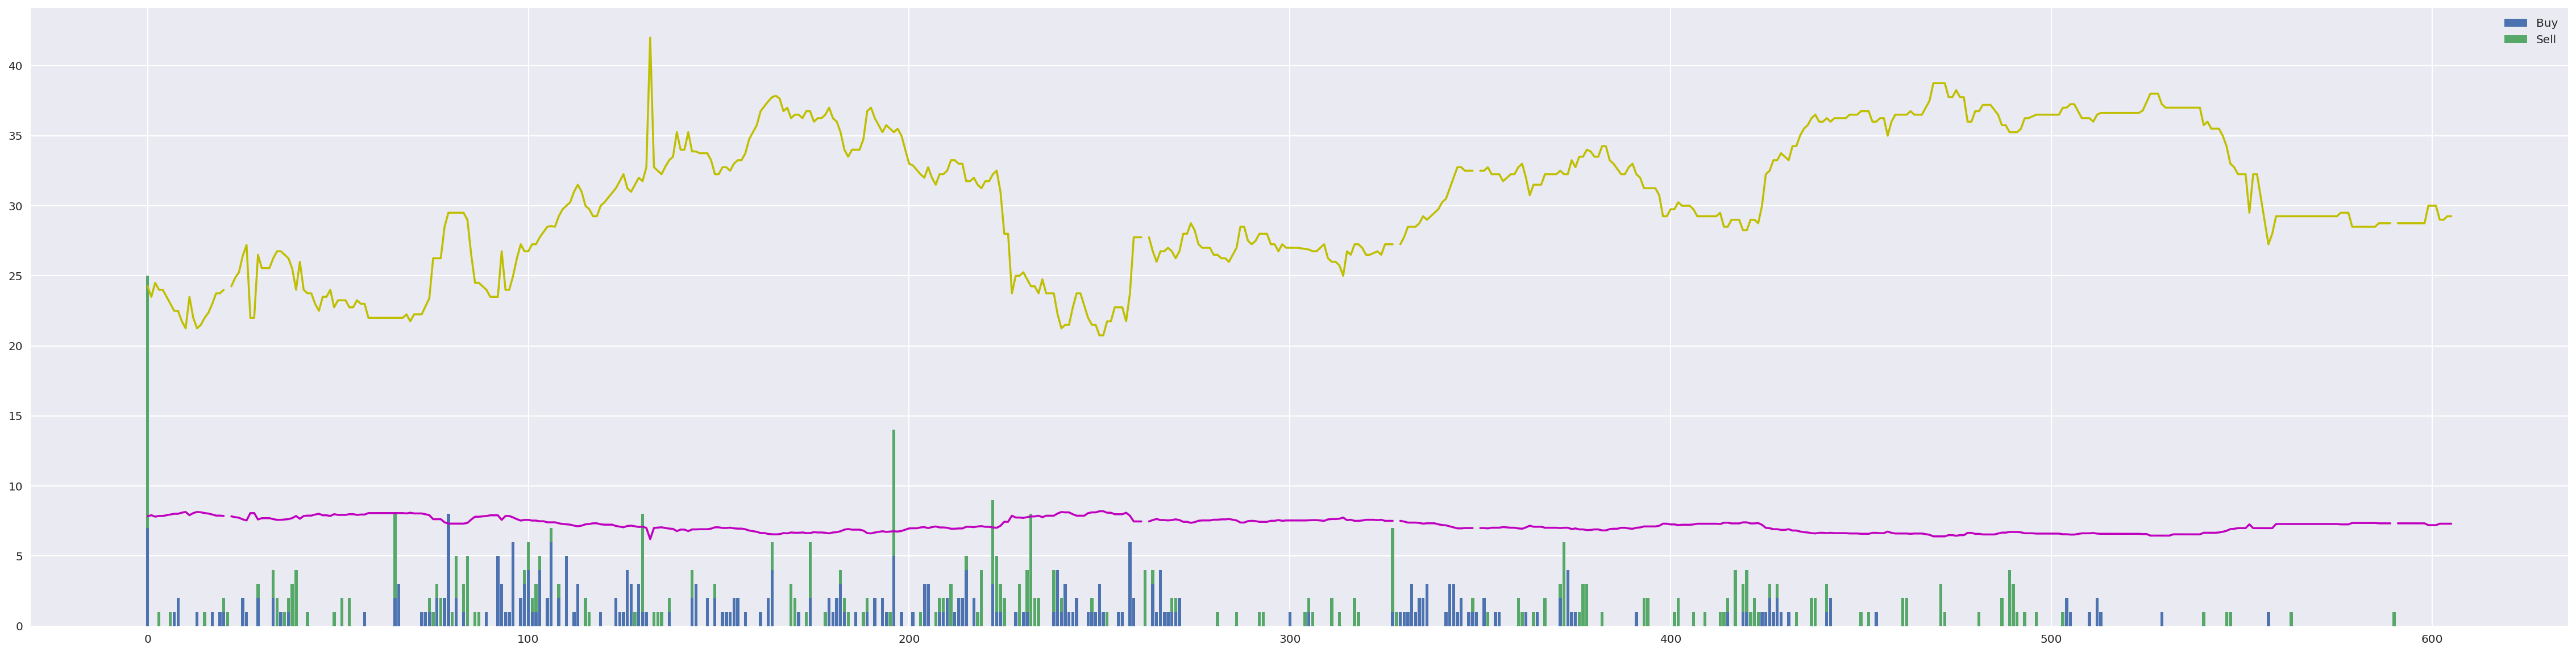

In [314]:
from matplotlib import pyplot

plt.figure(figsize=(40,10))
p1 = plt.bar(history_idx_1_fill_0.index, history_idx_1_fill_0.buy_count, 0.8)
p2 = plt.bar(history_idx_1_fill_0.index, history_idx_1_fill_0.sell_count, 0.8, bottom=history_idx_1_fill_0.buy_count)
plt.plot(history_idx_1_fill_0.index, history_idx_1_fill_0.Yield, color='m')
plt.plot(history_idx_1_fill_0.index, history_idx_1_fill_0.Price - 80, color='y')
plt.legend((p1[0], p2[0]), ('Buy', 'Sell'))
plt.show()

In [464]:
def fill_trend_buy_sell(df):
    df['trend_buy'] = 0
    for ix, d in df.iterrows():
        if ix > 0:
            if (np.isnan(df['buy_count'][ix-1]) and np.isfinite(df['buy_count'][ix])) or (np.isfinite(df['buy_count'][ix-1]) and np.isfinite(df['buy_count'][ix]) and df['buy_count'][ix] > df['buy_count'][ix-1]):
                df.set_value(ix, 'trend_buy', 1)
            #elif df['buy_count'][ix] < df['buy_count'][ix-1]:
            #    df.set_value(ix, 'trend_buy', 1)
                
    df['trend_sell'] = 0
    for ix, d in df.iterrows():
        if ix > 0:
            if (np.isnan(df['sell_count'][ix-1]) and np.isfinite(df['sell_count'][ix])) or (np.isfinite(df['sell_count'][ix-1]) and np.isfinite(df['sell_count'][ix]) and df['sell_count'][ix] > df['sell_count'][ix-1]):
                df.set_value(ix, 'trend_sell', 1)
#             elif (np.isfinite(df['sell_count'][ix+1]) and np.isfinite(df['sell_count'][ix]) and df['sell_count'][ix] > df['sell_count'][ix+1]) or (np.isnan(df['sell_count'][ix+1]) and np.isfinite(df['buy_count'][ix])):
#                 df.set_value(ix, 'trend_sell', -1)

In [465]:
fill_trend_buy_sell(history_idx_1)

In [466]:
history_idx_1.loc[-2:3].ZSpread.var()

0.0040916666666667755

In [765]:
def fill_variabilites(df, time_days=7):
    df['Yield_var'] = 0.0
    df['ZSpread_var'] = 0.0
    df['Price_var'] = 0.0
    for ix, _ in df.iterrows():
        start = ix - time_days - 1
        if ix <= 1:
            continue
        if start < 0:
            start = 0
        df.set_value(ix, 'Yield_var', df.loc[start:ix - 1].Yield.var())
        df.set_value(ix, 'ZSpread_var', df.loc[start:ix - 1].ZSpread.var())
        df.set_value(ix, 'Price_var', df.loc[start:ix - 1].Price.var())        

In [766]:
fill_variabilites(history_idx_1)

In [767]:
history_idx_1.head()

,buy_count,sell_count,Price,Yield,ZSpread,trend_buy,trend_sell,Yield_var,ZSpread_var,Price_var,EMA_Price_Short_term,EMA_Price_Med_term,EMA_Price_Long_term,EMA_Price_period_1,EMA_Price_period_2,MACD,MACD_signal,MACD_hist,SMA_20,SMA_150,strategy_1,SMA_60
0,7.0,18.0,104.25,7.835,5.505,0,0,0.000000,0.000000,0.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,NaN,NaN,103.50,7.912,5.599,0,0,0.000000,0.000000,0.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,NaN,NaN,104.50,7.810,5.503,0,0,0.002965,0.004418,0.281250,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,1.0,104.00,7.860,5.627,0,1,0.002826,0.003009,0.270833,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,NaN,NaN,104.00,7.860,5.663,0,0,0.001899,0.004092,0.182292,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [682]:
def calculate_SMA(df, period, start=0, column='Price'):
    """
        Returning the First SMA to calculate the first EMA
    """
    return df.loc[start:period + start - 1][column].sum() / period

In [600]:
def calculate_EMA(prev_EMA, price, multiplier):
    """
        Returning the EMA for t time
    """
    return (price - prev_EMA) * multiplier + prev_EMA

In [671]:
def fill_EMA(df, period=20, name_column='EMA_Price_Short_term', column='Price'):
    """
        Exponential moving averages (EMAs) reduce the lag by applying more weight to recent prices
    """
    first_SMA = calculate_SMA(df, period, column=column)
    multiplier= (2.0 / (period + 1))    
    df[name_column] = np.nan
    for ix, _ in df.iterrows():
        if ix < period - 1:
            continue
        elif ix == period - 1:
            df.set_value(ix, name_column, first_SMA)
        else:
            if np.isnan(df.loc[ix][column]):
                df.set_value(ix, column, (df.loc[ix-1][column] + df.loc[ix+1][column]) / 2)
            prev_EMA = df.loc[ix-1][name_column]
            actual_EMA = calculate_EMA(prev_EMA, df.loc[ix][column], multiplier)
            df.set_value(ix, name_column, actual_EMA)
        

In [634]:
fill_EMA(history_idx_1)
fill_EMA(history_idx_1, period=20, name_column='EMA_Price_Med_term')
fill_EMA(history_idx_1, period=150, name_column='EMA_Price_Long_term')

In [687]:
def fill_SMA(df, period=20, name_column='SMA_20', column='Price'):
    """
        A simple moving average is formed by computing the average price of 
        a security over a specific number of periods
    """
    df[name_column] = np.nan
    for ix, _ in df.iterrows():
        if ix < period - 1:
            continue
        else:
            if ix + period > df.shape[0]:
                period_temp = df.shape[0] - ix
            else:
                period_temp = period
            sma = calculate_SMA(df, period_temp, start=ix, column=column)
            df.set_value(ix, name_column, sma)

In [720]:
fill_SMA(history_idx_1, period=20, name_column='SMA_20')
fill_SMA(history_idx_1, period=60, name_column='SMA_60')

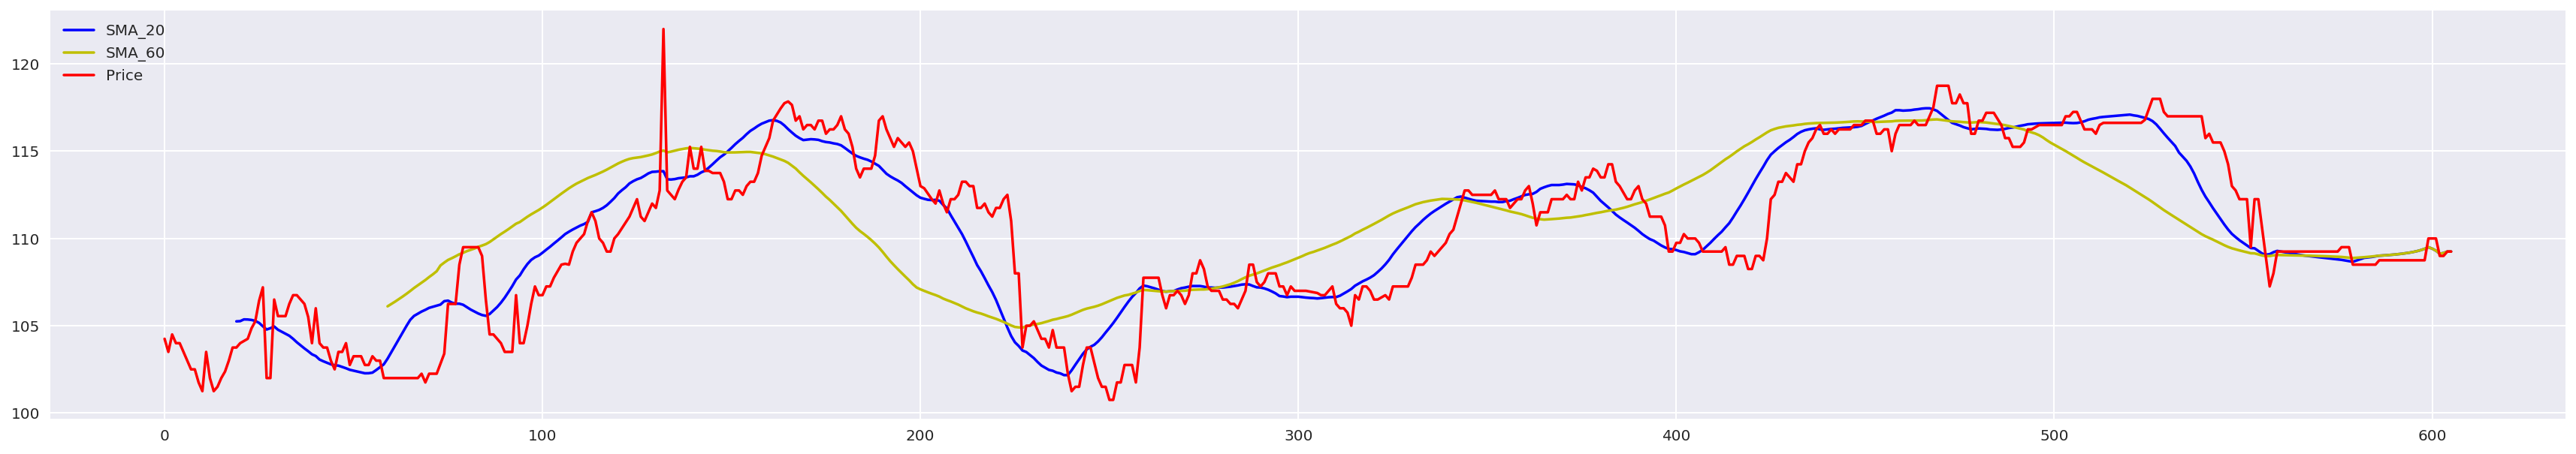

In [721]:
plt.figure(figsize=(30,5))
p1 = plt.plot(history_idx_1.index, history_idx_1.SMA_20, color='b')
p2 = plt.plot(history_idx_1.index, history_idx_1.SMA_60, color='y')
p3 = plt.plot(history_idx_1.index, history_idx_1.Price, color='r')
#p4 = plt.plot(history_idx_1.index, history_idx_1.EMA_Price_period_1, color='r')
plt.legend((p1[0], p2[0], p3[0]), ('SMA_20', 'SMA_60', 'Price'), loc = 'upper left')
plt.show()

In [645]:
history_idx_1.columns

Index(['buy_count', 'sell_count', 'Price', 'Yield', 'ZSpread', 'trend_buy',
       'trend_sell', 'Yield_var', 'ZSpread_var', 'Price_var',
       'EMA_Price_Short_term', 'EMA_Price_Med_term', 'EMA_Price_Long_term',
       'EMA_Price_period_1', 'EMA_Price_period_2', 'MACD', 'MACD_signal',
       'MACD_hist'],
      dtype='object')

In [618]:
# Making MACD
def fill_MACD(df, period_EMA_1=12, period_EMA_2=26, period_EMA_3=9, name='MACD'):
    """
        First derivative: 12-day EMA and 26-day EMA
        Second derivative: MACD (12-day EMA less the 26-day EMA)
        Third derivative: MACD signal line (9-day EMA of MACD)
        Fourth derivative: MACD-Histogram (MACD less MACD signal line)
    """
    name_column_1 = 'EMA_Price_' + str(period_EMA_1)
    name_column_2 = 'EMA_Price_' + str(period_EMA_2)
    fill_EMA(df, period=period_EMA_1, name_column=name_column_1)
    fill_EMA(df, period=period_EMA_2, name_column=name_column_2)
    
    #df['EMA_Price_period_2'].loc[period_EMA_1-1:period_EMA_2-2] = 0
    df[name] = df[name_column_1] - df[name_column_2]
    
    fill_EMA(df, period=period_EMA_3 + period_EMA_2, name_column=name + '_signal', column=name)
    
    #df['MACD'].loc[period_EMA_1-1:period_EMA_3 + period_EMA_1-2] = 0
    df[name + '_hist'] = df[name] - df[name + '_signal']

In [670]:
fill_MACD(history_idx_1)

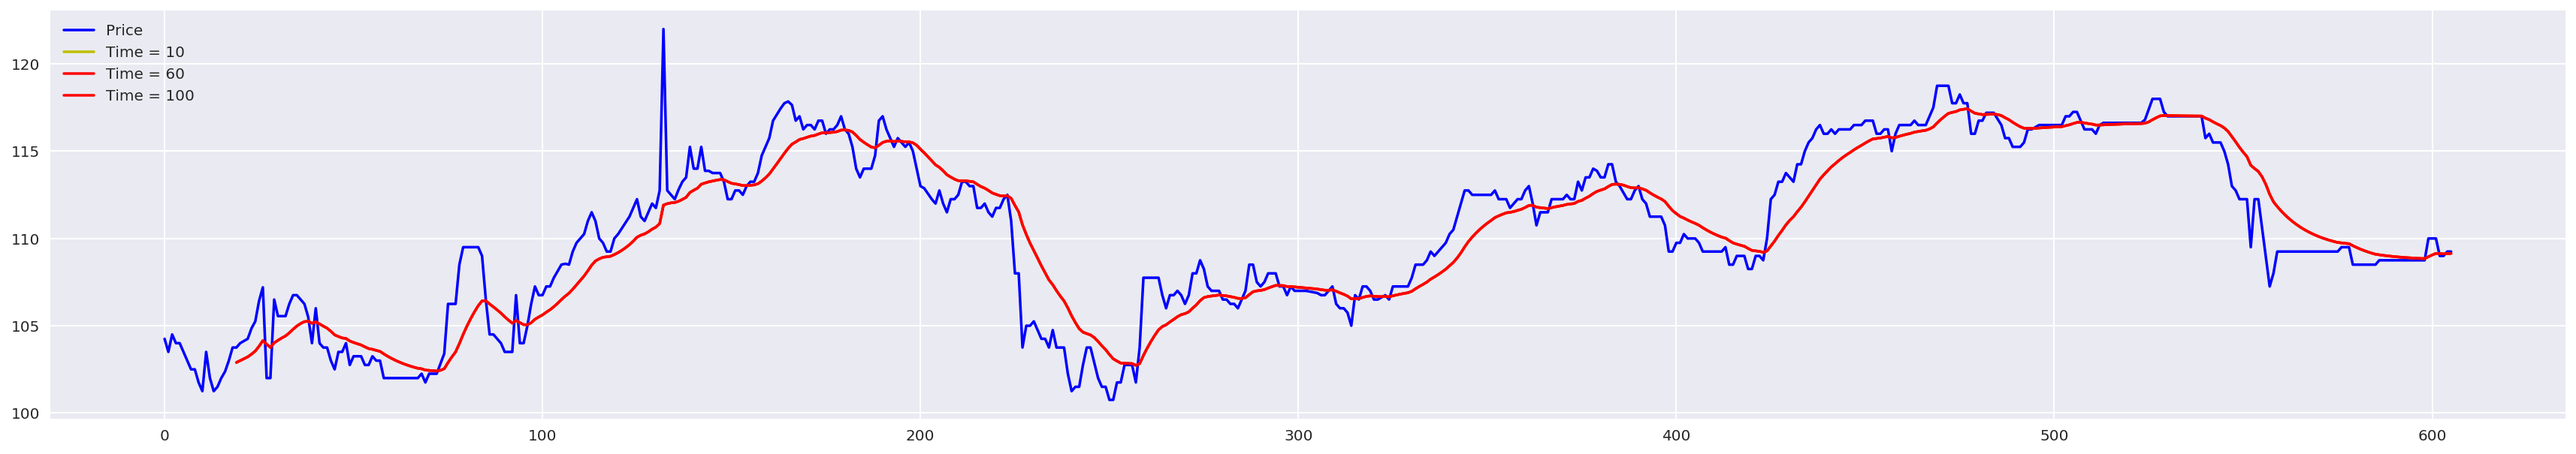

In [667]:
plt.figure(figsize=(30,5))
p1 = plt.plot(history_idx_1.index, history_idx_1.Price, color='b')
p2 = plt.plot(history_idx_1.index, history_idx_1.EMA_Price_Short_term, color='y')
p3 = plt.plot(history_idx_1.index, history_idx_1.EMA_Price_Med_term, color='r')
p4 = plt.plot(history_idx_1.index, history_idx_1.EMA_Price_Med_term, color='r')
plt.legend((p1[0], p2[0], p3[0], p4[0]), ('Price', 'Time = 10', 'Time = 60', 'Time = 100'), loc = 'upper left')
plt.show()

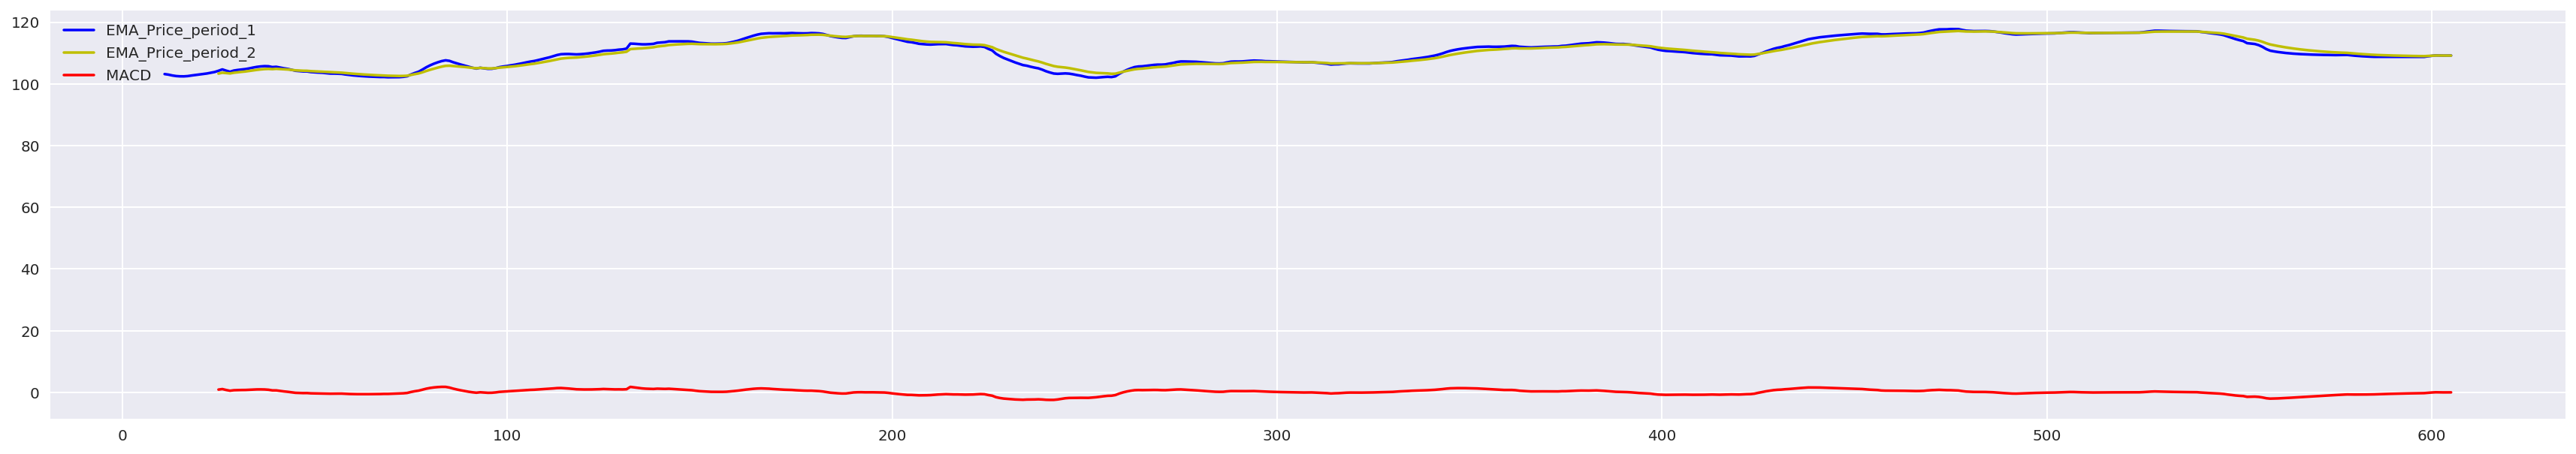

In [620]:
plt.figure(figsize=(30,5))
p1 = plt.plot(history_idx_1.index, history_idx_1.EMA_Price_period_1, color='b')
p2 = plt.plot(history_idx_1.index, history_idx_1.EMA_Price_period_2, color='y')
p3 = plt.plot(history_idx_1.index, history_idx_1.MACD, color='r')
#p4 = plt.plot(history_idx_1.index, history_idx_1.EMA_Price_period_1, color='r')
plt.legend((p1[0], p2[0], p3[0]), ('EMA_Price_period_1', 'EMA_Price_period_2', 'MACD'), loc = 'upper left')
plt.show()

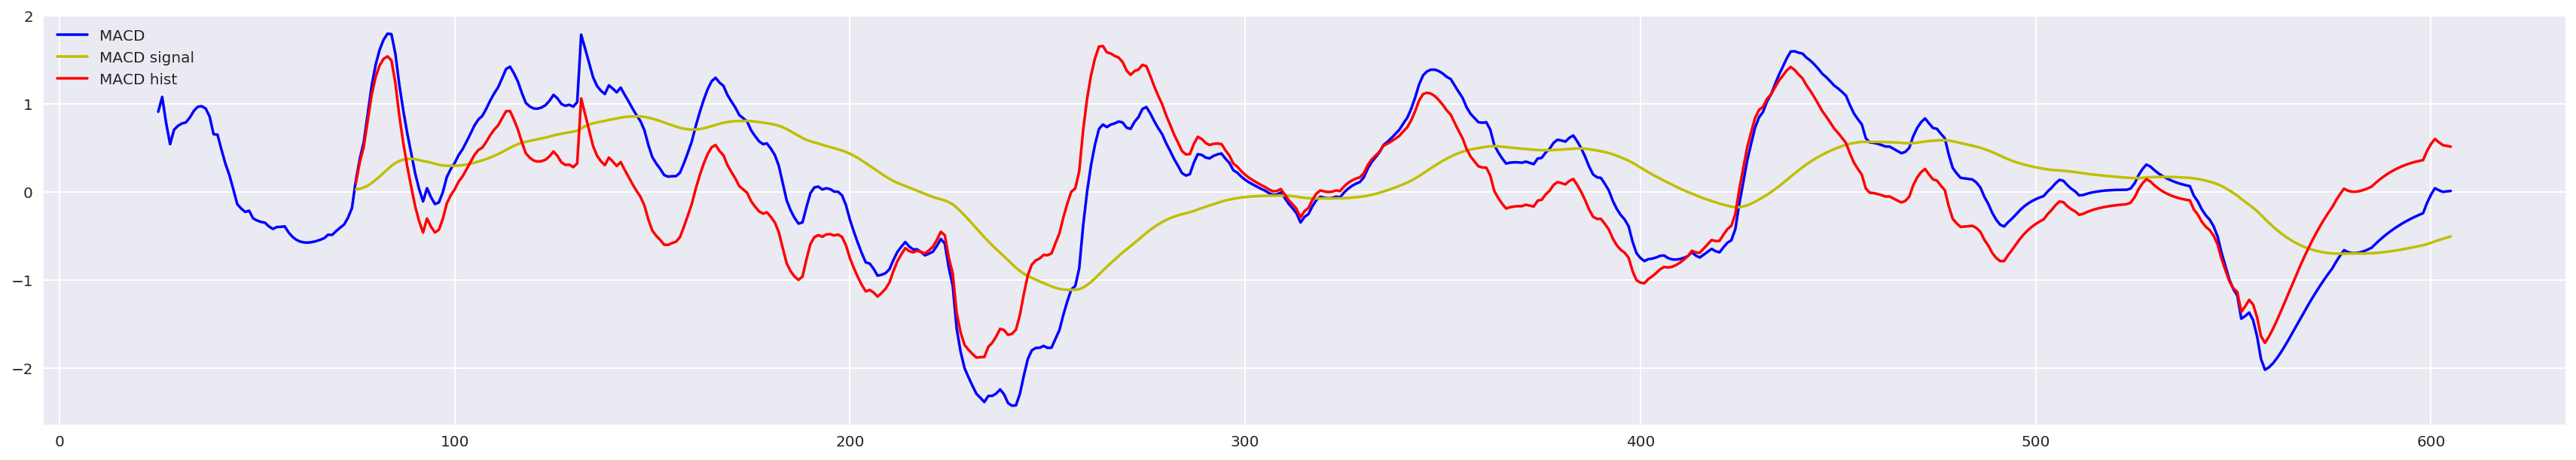

In [668]:
plt.figure(figsize=(30,5))
p1 = plt.plot(history_idx_1.index, history_idx_1.MACD, color='b')
p2 = plt.plot(history_idx_1.index, history_idx_1.MACD_signal, color='y')
p3 = plt.plot(history_idx_1.index, history_idx_1.MACD_hist, color='r')
#p4 = plt.plot(history_idx_1.index, history_idx_1.EMA_Price_period_1, color='r')
plt.legend((p1[0], p2[0], p3[0]), ('MACD', 'MACD signal', 'MACD hist'), loc = 'upper left')
plt.show()

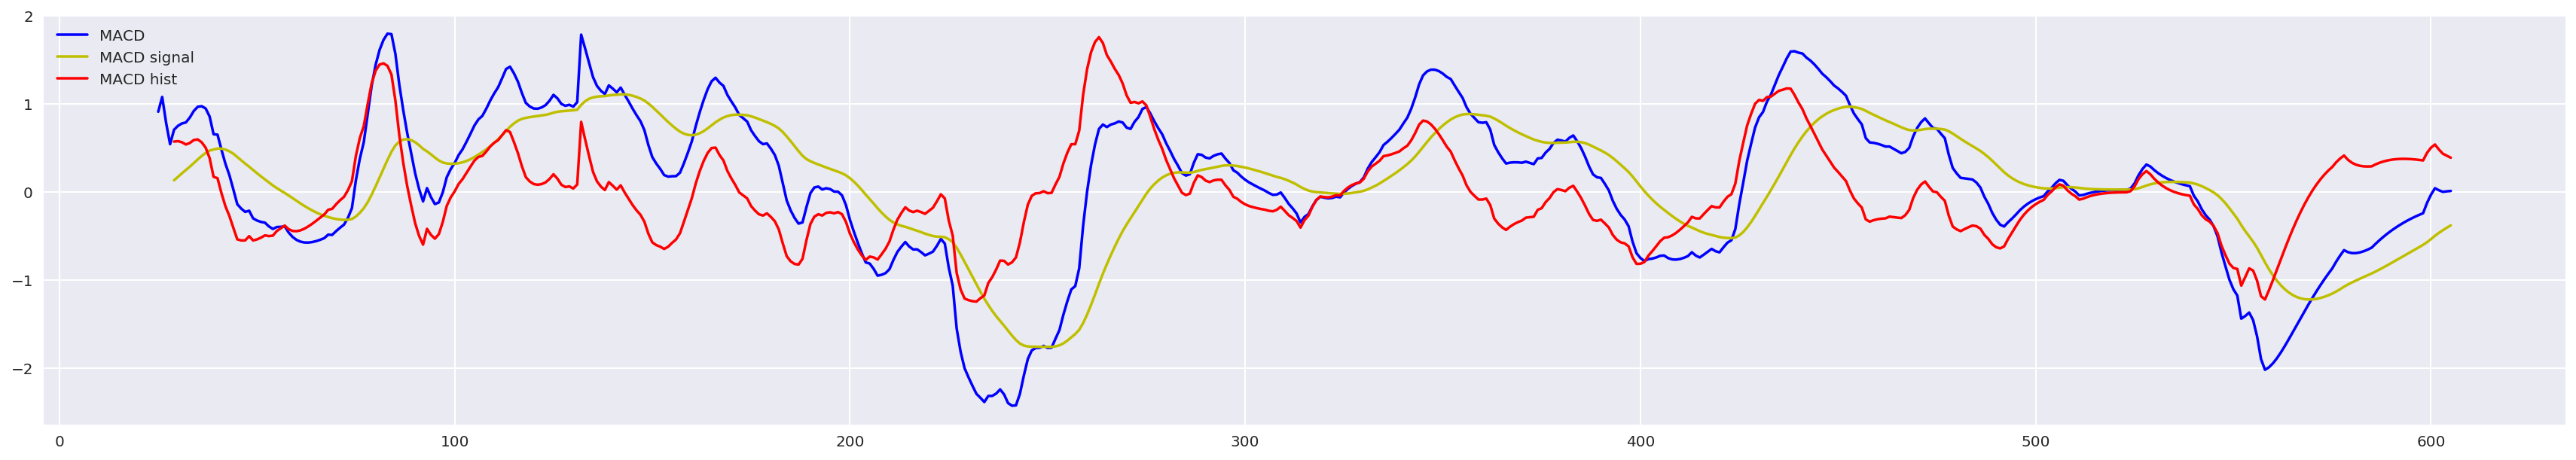

In [662]:
plt.figure(figsize=(30,5))
p1 = plt.plot(history_idx_1.index, history_idx_1.MACD, color='b')
p2 = plt.plot(history_idx_1.index, history_idx_1.MACD_signal, color='y')
p3 = plt.plot(history_idx_1.index, history_idx_1.MACD_hist, color='r')
#p4 = plt.plot(history_idx_1.index, history_idx_1.EMA_Price_period_1, color='r')
plt.legend((p1[0], p2[0], p3[0]), ('MACD', 'MACD signal', 'MACD hist'), loc = 'upper left')
plt.show()

In [690]:
history_idx_1_fill_0 = history_idx_1.copy()
history_idx_1_fill_0.buy_count.fillna(0, inplace=True)
history_idx_1_fill_0.sell_count.fillna(0, inplace=True)

AttributeError: 'DataFrame' object has no attribute 'MACD_hist'

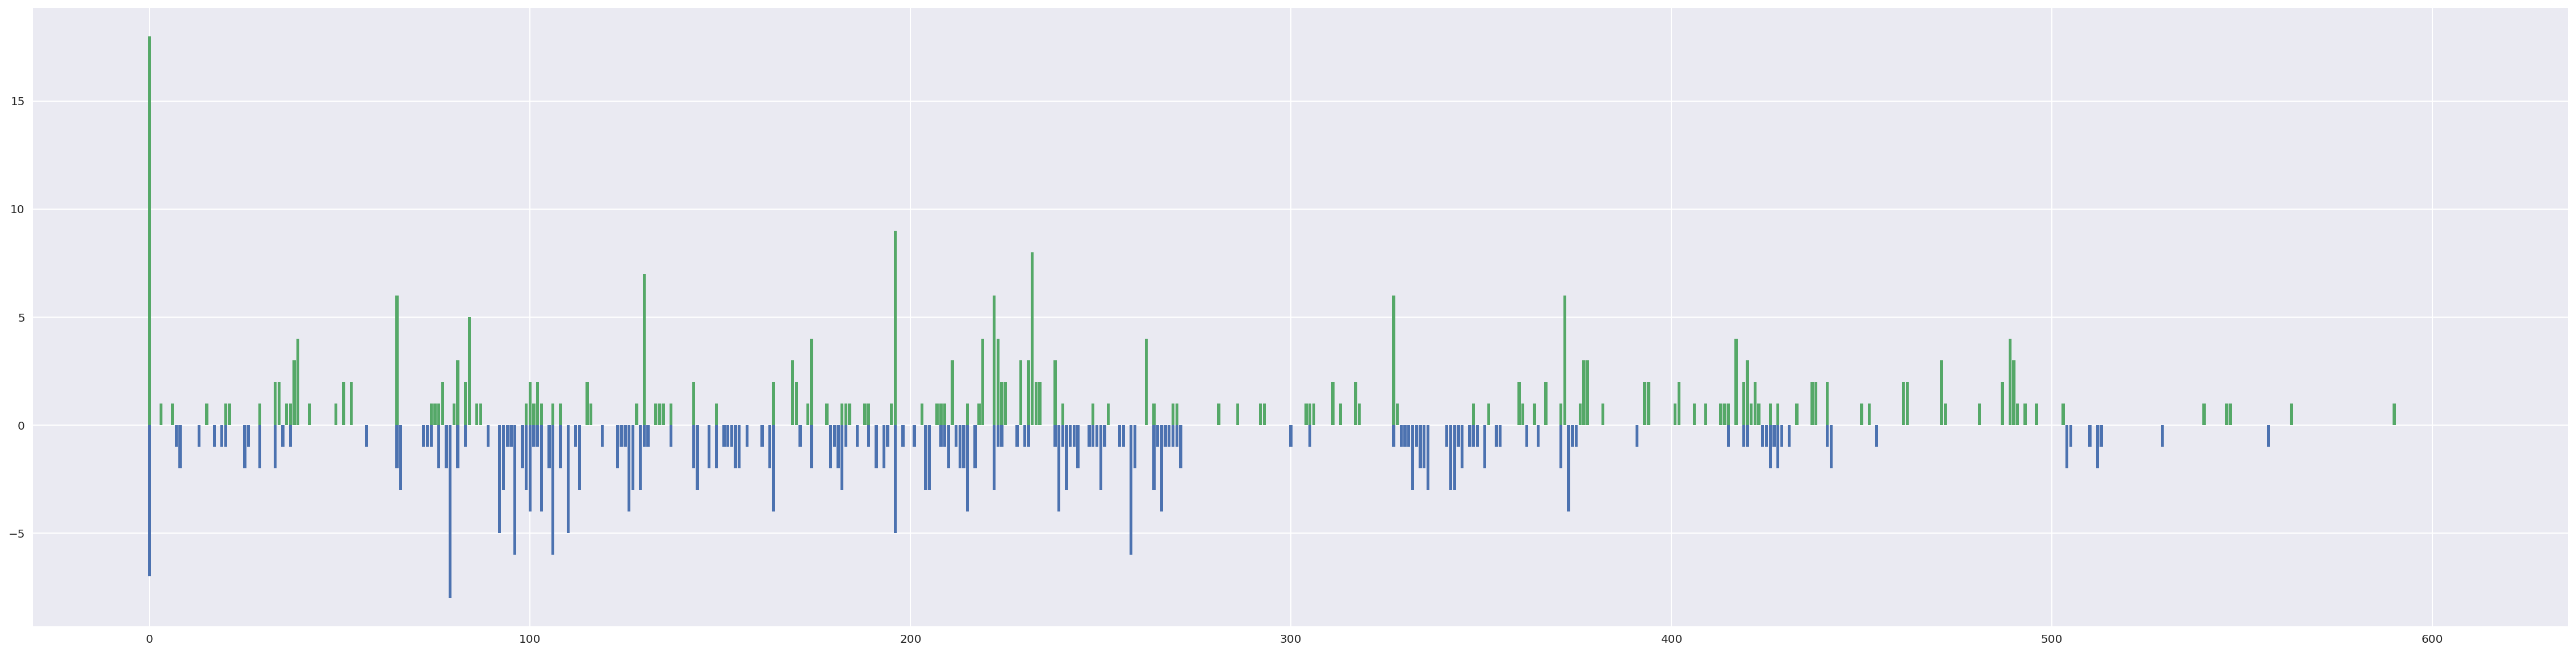

In [871]:
plt.figure(figsize=(40,10))
p1 = plt.bar(history_idx_1_fill_0.index, -history_idx_1_fill_0.buy_count, 0.8)
p2 = plt.bar(history_idx_1_fill_0.index, history_idx_1_fill_0.sell_count, 0.8)
p3 =plt.plot(history_idx_1_fill_0.index, history_idx_1_fill_0.MACD_hist, color='m')
p4 = plt.plot(history_idx_1_fill_0.index, history_idx_1_fill_0.SMA_20-100, color='r')
p5 = plt.plot(history_idx_1_fill_0.index, history_idx_1_fill_0.SMA_150-100, color='y')
plt.legend((p1[0], p2[0], p4[0], p5[0]), ('Buy', 'Sell', 'SMA 20', 'SMA 150'), loc='upper left')
plt.show()

In [741]:
def make_strategy_1(df, name_SMA_1='SMA_20', name_SMA_2='SMA_150'):
    """
        This function stablish a strategy of inversion:
            * Buy:
                1. Moving averages show a bullish trading bias with the 20-day SMA trading above the 
                    150-day SMA.
                2. MACD-Histogram moves into positive territory to signal an upturn after the pullback
            * Sell:
                1. Moving averages show a bearish trading bias with the 20-day SMA trading below the 
                    150-day SMA.
                2. MACD-Histogram moves into negative territory to signal a downturn after the bounce.
        "0" - Nothing, "1" - Buy, "-1" - Sell
    """
    df['strategy_1'] = np.nan
    for ix, _ in df.iterrows():
        if df.loc[ix][name_SMA_1] - df.loc[ix][name_SMA_2] > 0 and df.loc[ix].MACD_hist > 0:
            df.set_value(ix, 'strategy_1', 1)
        elif df.loc[ix][name_SMA_1] - df.loc[ix][name_SMA_2] < 0 and df.loc[ix].MACD_hist < 0:
            df.set_value(ix, 'strategy_1', -1)

In [742]:
make_strategy_1(history_idx_1, name_SMA_2='SMA_60')

In [779]:
def fill_PPO(df, period_EMA_1=12, period_EMA_2=26, period_EMA_3=9, name_ppo='PPO'):
    """
        The PPO is a momentum indicator that measure the difference between the 26-period and 
        the 12-period exponential moving averages. 
        The PPO expresses the difference between the exponential moving averages as a percentage. 
        This allows a trader to use the PPO indicator to compare stocks with different prices more 
        easily.
        
        Percentage Price Oscillator (PPO): {(12-day EMA - 26-day EMA)/26-day EMA} x 100
        Signal Line: 9-day EMA of PPO
        Histogram: PPO - Signal Line
    """
    name_column_1 = 'EMA_Price_' + str(period_EMA_1)
    name_column_2 = 'EMA_Price_' + str(period_EMA_2)
    
    fill_EMA(df, period=period_EMA_1, name_column=name_column_1)
    fill_EMA(df, period=period_EMA_2, name_column=name_column_2)
    
    df[name_ppo] = 100 * ((df[name_column_1] - df[name_column_2]) / df[name_column_2])
    fill_EMA(df, period=period_EMA_3 + period_EMA_2, name_column=name_ppo + '_signal', column=name_ppo)
    
    df[name_ppo + '_hist'] = df[name_ppo] - df[name_ppo + '_signal']

In [780]:
fill_PPO(history_idx_1)

In [788]:
history_idx_1.loc[60:70]

,buy_count,sell_count,Price,Yield,ZSpread,trend_buy,trend_sell,Yield_var,ZSpread_var,Price_var,EMA_Price_Short_term,EMA_Price_Med_term,EMA_Price_Long_term,EMA_Price_period_1,EMA_Price_period_2,MACD,MACD_signal,MACD_hist,SMA_20,SMA_150,strategy_1,SMA_60,EMA_Price_12,EMA_Price_26,PPO_12_26,PPO_12_26_signal,PPO_12_26_hist,PPO,PPO_signal,PPO_hist
60,NaN,NaN,102.00,8.064,6.169,0,0,0.002704,0.004421,0.250000,103.133217,103.133217,NaN,102.755625,103.298703,-0.543078,-0.075365,-0.467713,103.48625,NaN,-1.0,106.244167,102.755625,103.298703,-0.525736,-0.073627,-0.452109,-0.525736,-0.073627,-0.452109
61,NaN,NaN,102.00,8.064,6.169,0,0,0.002885,0.003752,0.266741,103.025292,103.025292,NaN,102.639375,103.202503,-0.563128,-0.102463,-0.460665,103.86125,NaN,-1.0,106.381667,102.639375,103.202503,-0.545654,-0.099850,-0.445803,-0.545654,-0.099850,-0.445803
62,NaN,NaN,102.00,8.064,6.188,0,0,0.003283,0.003528,0.303571,102.927645,102.927645,NaN,102.541010,103.113429,-0.572419,-0.128572,-0.443847,104.23625,NaN,-1.0,106.524717,102.541010,103.113429,-0.555136,-0.125144,-0.429992,-0.555136,-0.125144,-0.429992
63,NaN,NaN,102.00,8.064,6.237,0,0,0.003464,0.003519,0.320312,102.839298,102.839298,NaN,102.457777,103.030953,-0.573175,-0.153272,-0.419903,104.61125,NaN,-1.0,106.673333,102.457777,103.030953,-0.556314,-0.149098,-0.407216,-0.556314,-0.149098,-0.407216
64,NaN,NaN,102.00,8.064,6.225,0,0,0.002318,0.003293,0.214286,102.759365,102.759365,NaN,102.387350,102.954586,-0.567236,-0.176270,-0.390966,104.98625,NaN,-1.0,106.827500,102.387350,102.954586,-0.550957,-0.171423,-0.379534,-0.550957,-0.171423,-0.379534
65,2.0,6.0,102.00,8.064,6.260,1,1,0.001352,0.003297,0.125000,102.687044,102.687044,NaN,102.327758,102.883876,-0.556118,-0.197373,-0.358745,105.33625,NaN,-1.0,106.990000,102.327758,102.883876,-0.540530,-0.191929,-0.348601,-0.540530,-0.191929,-0.348601
66,3.0,NaN,102.00,8.064,6.242,1,0,0.000000,0.001542,0.000000,102.621611,102.621611,NaN,102.277333,102.818403,-0.541070,-0.216467,-0.324603,105.56125,NaN,-1.0,107.160833,102.277333,102.818403,-0.526238,-0.210502,-0.315736,-0.526238,-0.210502,-0.315736
67,NaN,NaN,102.00,8.064,6.259,0,0,0.000000,0.001199,0.000000,102.562410,102.562410,NaN,102.234667,102.757781,-0.523114,-0.233503,-0.289611,105.68625,NaN,-1.0,107.315000,102.234667,102.757781,-0.509075,-0.227089,-0.281986,-0.509075,-0.227089,-0.281986
68,NaN,NaN,102.25,8.038,6.290,0,0,0.000000,0.001447,0.000000,102.532657,102.532657,NaN,102.237026,102.720168,-0.483142,-0.247372,-0.235770,105.81125,NaN,-1.0,107.465000,102.237026,102.720168,-0.470348,-0.240604,-0.229744,-0.470348,-0.240604,-0.229744
69,NaN,NaN,101.75,8.090,6.310,0,0,0.000084,0.001562,0.007812,102.458118,102.458118,NaN,102.162099,102.648303,-0.486205,-0.260640,-0.225564,105.91125,NaN,-1.0,107.619167,102.162099,102.648303,-0.473661,-0.253551,-0.220109,-0.473661,-0.253551,-0.220109


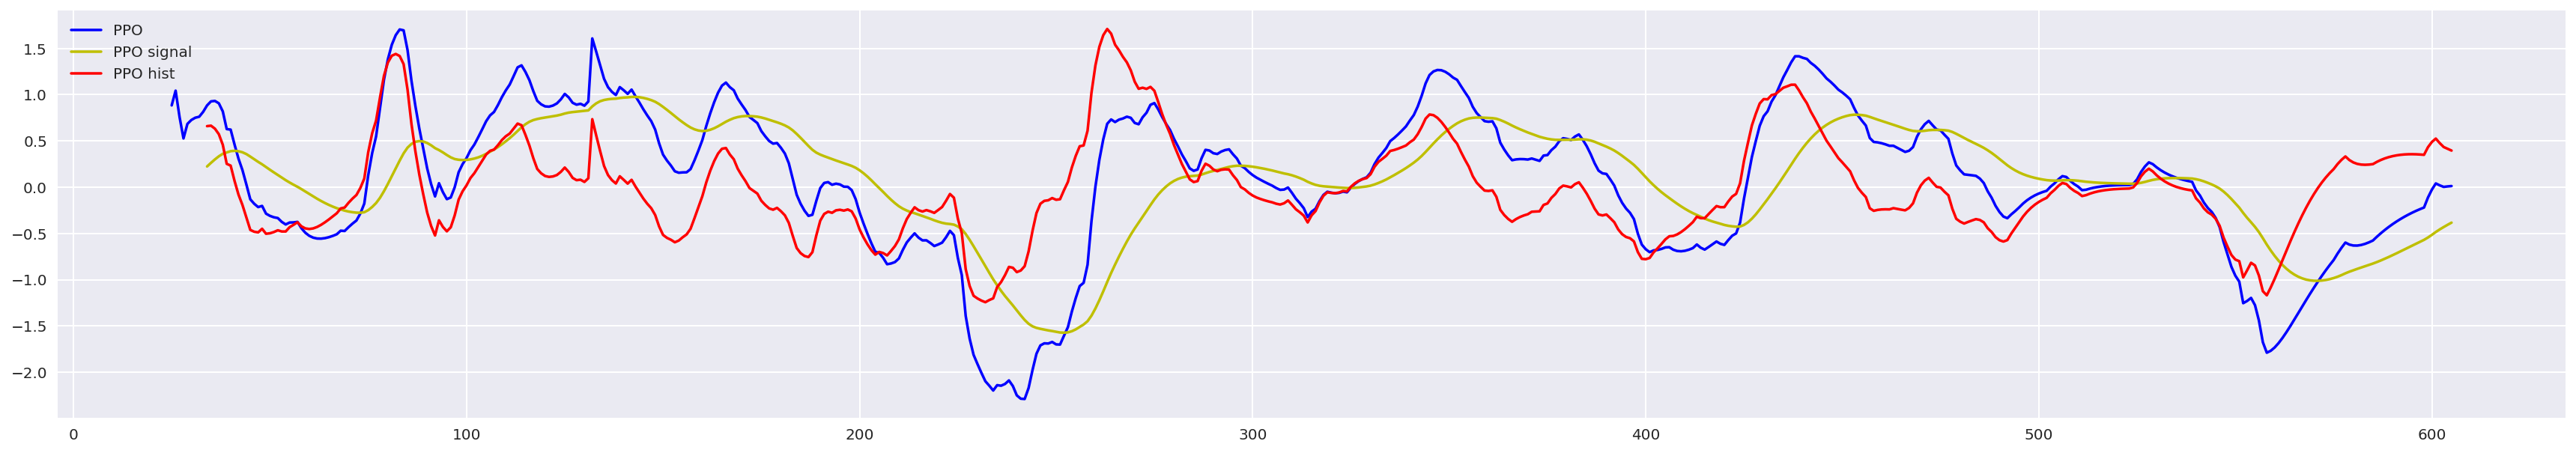

In [782]:
plt.figure(figsize=(30,5))
p1 = plt.plot(history_idx_1.index, history_idx_1.PPO, color='b')
p2 = plt.plot(history_idx_1.index, history_idx_1.PPO_signal, color='y')
p3 = plt.plot(history_idx_1.index, history_idx_1.PPO_hist, color='r')
#p4 = plt.plot(history_idx_1.index, history_idx_1.EMA_Price_period_1, color='r')
plt.legend((p1[0], p2[0], p3[0]), ('PPO', 'PPO signal', 'PPO hist'), loc = 'upper left')
plt.show()

In [743]:
history_idx_1_fill_0 = history_idx_1.copy()
history_idx_1_fill_0.buy_count.fillna(0, inplace=True)
history_idx_1_fill_0.sell_count.fillna(0, inplace=True)

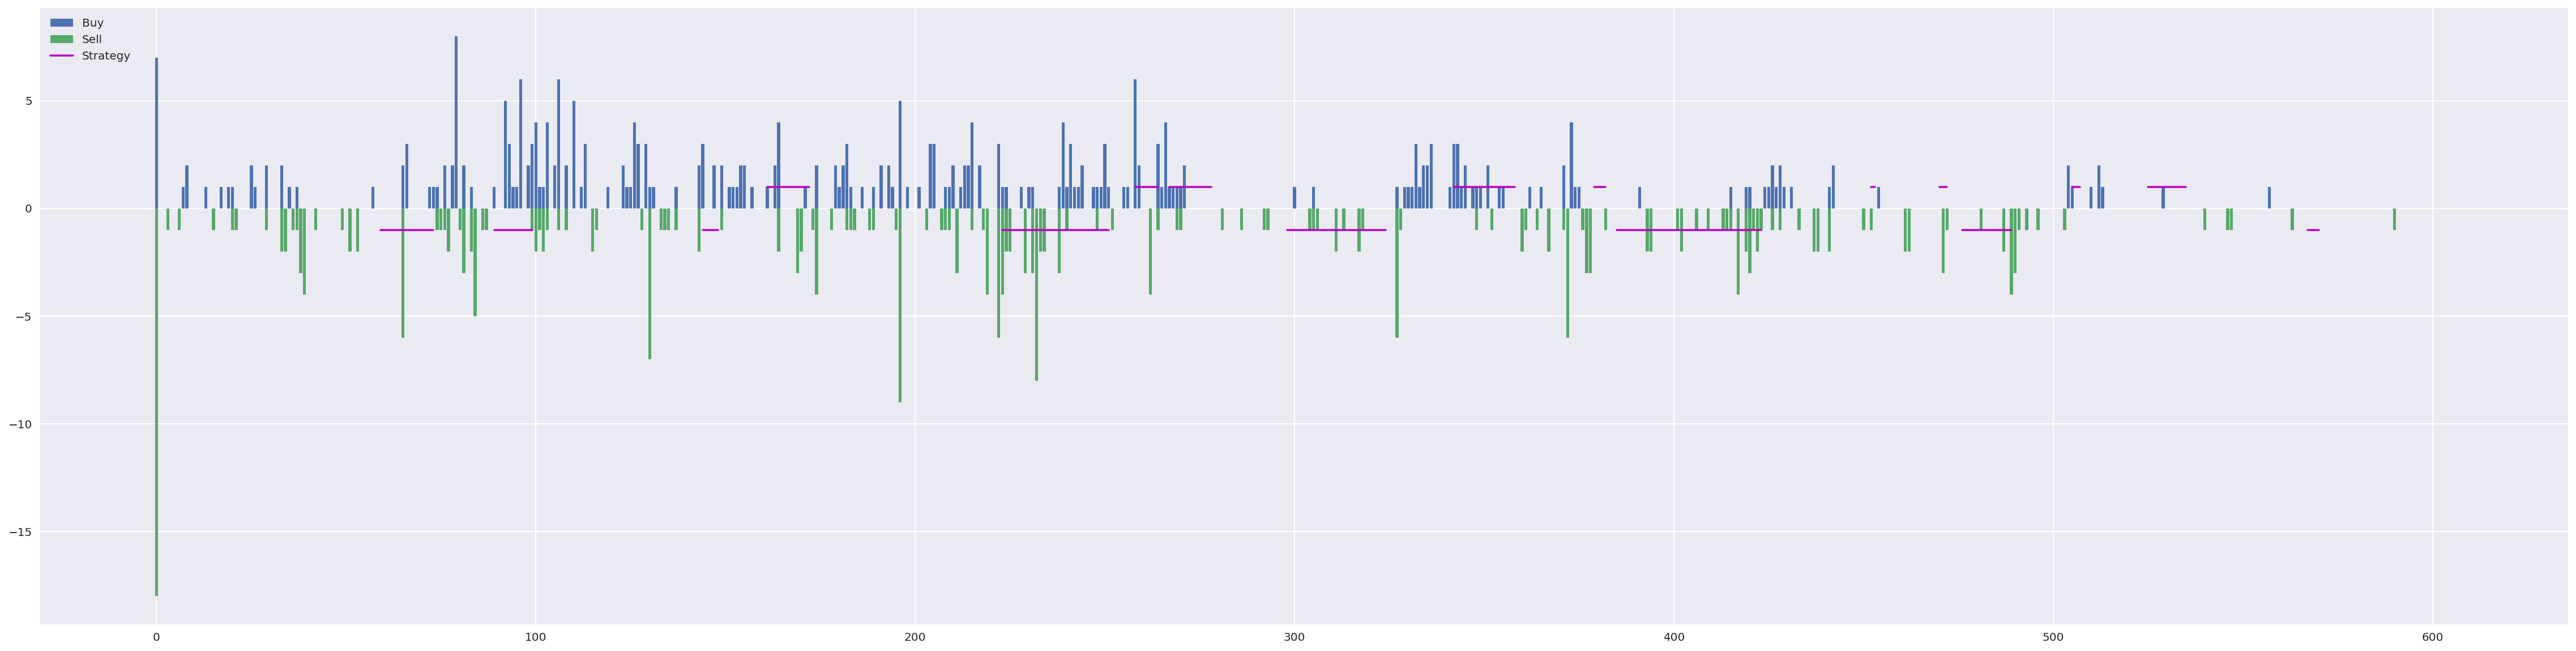

In [744]:
plt.figure(figsize=(40,10))
p1 = plt.bar(history_idx_1_fill_0.index, history_idx_1_fill_0.buy_count, 0.8)
p2 = plt.bar(history_idx_1_fill_0.index, -history_idx_1_fill_0.sell_count, 0.8)
p3 =plt.plot(history_idx_1_fill_0.index, history_idx_1_fill_0.strategy_1, color='m')
plt.legend((p1[0], p2[0], p3[0]), ('Buy', 'Sell', 'Strategy'), loc='upper left')
plt.show()

In [775]:
history_idx_1.loc[history_idx_1['strategy_1'] == -1].sum()[['buy_count', 'sell_count', 'trend_buy', 'trend_sell']]

buy_count     65.0
sell_count    79.0
trend_buy     23.0
trend_sell    25.0
dtype: float64

In [777]:
history_idx_1.loc[history_idx_1['strategy_1'] == 1].sum()[['buy_count', 'sell_count', 'trend_buy', 'trend_sell']]

buy_count     43.0
sell_count    22.0
trend_buy     13.0
trend_sell    10.0
dtype: float64

In [797]:
macro.columns

Index(['DateKey', 'SSE', 'DAX', 'EUROSTOXX', 'VSTOXX', 'FTSE100', 'HSI',
       'NIKKEI', 'DOWJONES_INDU', 'SP500',
       ...
       'Swap_TRY2Y', 'Swap_TRY5Y', 'Swap_USD10Y', 'Swap_USD2Y', 'Swap_USD30Y',
       'Swap_USD5Y', 'Swap_ZAR10Y', 'Swap_ZAR2Y', 'Swap_ZAR30Y', 'Swap_ZAR5Y'],
      dtype='object', length=112)

In [789]:
temp = history_idx_1.loc[(history_idx_1['strategy_1'] == 1) | (history_idx_1['strategy_1'] == -1)]
temp.fillna(temp.mean()).corr()

,buy_count,sell_count,Price,Yield,ZSpread,trend_buy,trend_sell,Yield_var,ZSpread_var,Price_var,EMA_Price_Short_term,EMA_Price_Med_term,EMA_Price_Long_term,EMA_Price_period_1,EMA_Price_period_2,MACD,MACD_signal,MACD_hist,SMA_20,SMA_150,strategy_1,SMA_60,EMA_Price_12,EMA_Price_26,PPO_12_26,PPO_12_26_signal,PPO_12_26_hist,PPO,PPO_signal,PPO_hist
buy_count,1.000000,-0.001043,-0.050810,0.052444,0.104472,0.270450,-0.023894,0.004217,0.061076,0.000808,-0.092175,-0.092175,-0.036414,-0.085038,-0.097263,0.021269,0.019961,0.010941,0.009593,-0.009052,0.007651,0.029829,-0.085038,-0.097263,0.019129,0.018643,0.009068,0.019129,0.018643,0.009068
sell_count,-0.001043,1.000000,-0.052908,0.052063,0.106244,0.021240,0.124153,0.210706,0.136928,0.214927,-0.009697,-0.009697,0.091243,-0.028863,0.002046,-0.152486,-0.094276,-0.135265,-0.100571,-0.180262,-0.054588,-0.148786,-0.028863,0.002046,-0.151770,-0.093461,-0.134161,-0.151770,-0.093461,-0.134161
Price,-0.050810,-0.052908,1.000000,-0.997691,-0.839820,-0.128988,-0.017496,-0.231078,-0.209406,-0.198556,0.940774,0.940774,0.447864,0.968372,0.919113,0.616400,0.657548,0.225131,0.925804,0.306971,0.504658,0.752700,0.968372,0.919113,0.613639,0.651409,0.229894,0.613639,0.651409,0.229894
Yield,0.052444,0.052063,-0.997691,1.000000,0.859425,0.137499,0.011407,0.229948,0.210733,0.198866,-0.940570,-0.940570,-0.460122,-0.967078,-0.919813,-0.606796,-0.644787,-0.224549,-0.921302,-0.321121,-0.496244,-0.751991,-0.967078,-0.919813,-0.604860,-0.638893,-0.230257,-0.604860,-0.638893,-0.230257
ZSpread,0.104472,0.106244,-0.839820,0.859425,1.000000,0.226384,-0.009959,0.246209,0.274835,0.234528,-0.815084,-0.815084,-0.476823,-0.824309,-0.809302,-0.402057,-0.377937,-0.206137,-0.739723,-0.350217,-0.403553,-0.605416,-0.824309,-0.809302,-0.405156,-0.374207,-0.215646,-0.405156,-0.374207,-0.215646
trend_buy,0.270450,0.021240,-0.128988,0.137499,0.226384,1.000000,0.004708,0.183017,0.198451,0.183385,-0.151559,-0.151559,-0.135473,-0.145263,-0.154354,-0.017393,-0.057091,0.038485,-0.078150,-0.146926,0.029445,-0.097246,-0.145263,-0.154354,-0.021262,-0.056828,0.031178,-0.021262,-0.056828,0.031178
trend_sell,-0.023894,0.124153,-0.017496,0.011407,-0.009959,0.004708,1.000000,0.154301,0.094625,0.151472,0.008280,0.008280,-0.028903,-0.002542,0.015876,-0.084926,-0.065183,-0.060586,0.001005,0.071507,-0.041741,0.075782,-0.002542,0.015876,-0.083258,-0.065621,-0.057199,-0.083258,-0.065621,-0.057199
Yield_var,0.004217,0.210706,-0.231078,0.229948,0.246209,0.183017,0.154301,1.000000,0.841769,0.996577,-0.188369,-0.188369,-0.062852,-0.202992,-0.175793,-0.206075,-0.274267,-0.011928,-0.295127,-0.366216,0.008610,-0.330740,-0.202992,-0.175793,-0.200461,-0.273076,-0.006226,-0.200461,-0.273076,-0.006226
ZSpread_var,0.061076,0.136928,-0.209406,0.210733,0.274835,0.198451,0.094625,0.841769,1.000000,0.829162,-0.238914,-0.238914,-0.108998,-0.223899,-0.244780,0.004483,-0.152713,0.184886,-0.210895,-0.267762,0.086261,-0.233352,-0.223899,-0.244780,0.008898,-0.151789,0.187569,0.008898,-0.151789,0.187569
Price_var,0.000808,0.214927,-0.198556,0.198866,0.234528,0.183385,0.151472,0.996577,0.829162,1.000000,-0.149803,-0.149803,-0.049430,-0.165089,-0.137909,-0.190648,-0.232206,-0.036086,-0.266838,-0.360227,0.009659,-0.302531,-0.165089,-0.137909,-0.185028,-0.230581,-0.030280,-0.185028,-0.230581,-0.030280


In [790]:
history_idx_1.fillna(history_idx_1.mean()).corr()

,buy_count,sell_count,Price,Yield,ZSpread,trend_buy,trend_sell,Yield_var,ZSpread_var,Price_var,EMA_Price_Short_term,EMA_Price_Med_term,EMA_Price_Long_term,EMA_Price_period_1,EMA_Price_period_2,MACD,MACD_signal,MACD_hist,SMA_20,SMA_150,strategy_1,SMA_60,EMA_Price_12,EMA_Price_26,PPO_12_26,PPO_12_26_signal,PPO_12_26_hist,PPO,PPO_signal,PPO_hist
buy_count,1.000000,0.251787,-0.023760,0.027678,0.059084,0.184058,0.046195,0.028114,0.049357,0.019534,-0.051067,-0.051067,0.018563,-0.036147,-0.062473,0.046427,0.017224,0.054342,-0.022693,-0.041832,0.002487,-0.024960,-0.036147,-0.062473,0.048079,0.017907,0.056105,0.048079,0.017907,0.056105
sell_count,0.251787,1.000000,-0.030621,0.034510,0.038170,0.027373,0.027664,-0.000528,-0.021943,-0.007778,0.009909,0.009909,0.008048,0.007116,0.008072,-0.040627,-0.027447,-0.030471,-0.033492,-0.047752,-0.023923,-0.059014,0.007116,0.008072,-0.040769,-0.027081,-0.031024,-0.040769,-0.027081,-0.031024
Price,-0.023760,-0.030621,1.000000,-0.993870,-0.733762,-0.044335,-0.029750,-0.158905,-0.150123,-0.103472,0.896603,0.896603,0.354445,0.943900,0.866518,0.392166,0.510891,0.048530,0.874386,0.207551,0.318143,0.577120,0.943900,0.866518,0.388702,0.504851,0.053839,0.388702,0.504851,0.053839
Yield,0.027678,0.034510,-0.993870,1.000000,0.770932,0.053971,0.034312,0.162843,0.158487,0.105576,-0.895724,-0.895724,-0.380617,-0.941416,-0.871109,-0.364796,-0.481745,-0.039989,-0.866417,-0.212181,-0.315052,-0.568183,-0.941416,-0.871109,-0.362290,-0.476227,-0.046126,-0.362290,-0.476227,-0.046126
ZSpread,0.059084,0.038170,-0.733762,0.770932,1.000000,0.202706,0.108022,0.260171,0.313754,0.229908,-0.708449,-0.708449,-0.501694,-0.721990,-0.707261,-0.027119,-0.034946,-0.031954,-0.621209,-0.245492,-0.230933,-0.345259,-0.721990,-0.707261,-0.027102,-0.031582,-0.037741,-0.027102,-0.031582,-0.037741
trend_buy,0.184058,0.027373,-0.044335,0.053971,0.202706,1.000000,0.071725,0.104268,0.112449,0.091160,-0.084107,-0.084107,-0.149532,-0.076927,-0.091087,0.063830,0.032994,0.053268,-0.014779,-0.084226,0.016871,-0.043061,-0.076927,-0.091087,0.064595,0.032942,0.053918,0.064595,0.032942,0.053918
trend_sell,0.046195,0.027664,-0.029750,0.034312,0.108022,0.071725,1.000000,0.117586,0.114793,0.102062,-0.042393,-0.042393,-0.071238,-0.034443,-0.046201,0.031484,0.029110,0.013609,-0.053716,0.033509,-0.024161,0.002292,-0.034443,-0.046201,0.032983,0.029335,0.015646,0.032983,0.029335,0.015646
Yield_var,0.028114,-0.000528,-0.158905,0.162843,0.260171,0.104268,0.117586,1.000000,0.894164,0.979306,-0.197095,-0.197095,-0.054623,-0.181112,-0.203843,0.039581,-0.070607,0.119443,-0.215737,-0.150532,0.005630,-0.117994,-0.181112,-0.203843,0.044955,-0.069096,0.123728,0.044955,-0.069096,0.123728
ZSpread_var,0.049357,-0.021943,-0.150123,0.158487,0.313754,0.112449,0.114793,0.894164,1.000000,0.892840,-0.225004,-0.225004,-0.063634,-0.194658,-0.248736,0.226414,0.068346,0.241178,-0.165858,-0.063367,0.041272,-0.006489,-0.194658,-0.248736,0.232405,0.071174,0.244486,0.232405,0.071174,0.244486
Price_var,0.019534,-0.007778,-0.103472,0.105576,0.229908,0.091160,0.102062,0.979306,0.892840,1.000000,-0.133689,-0.133689,-0.032738,-0.117447,-0.142387,0.059718,-0.008440,0.085118,-0.156367,-0.138884,0.005620,-0.069782,-0.117447,-0.142387,0.064532,-0.006327,0.088662,0.064532,-0.006327,0.088662


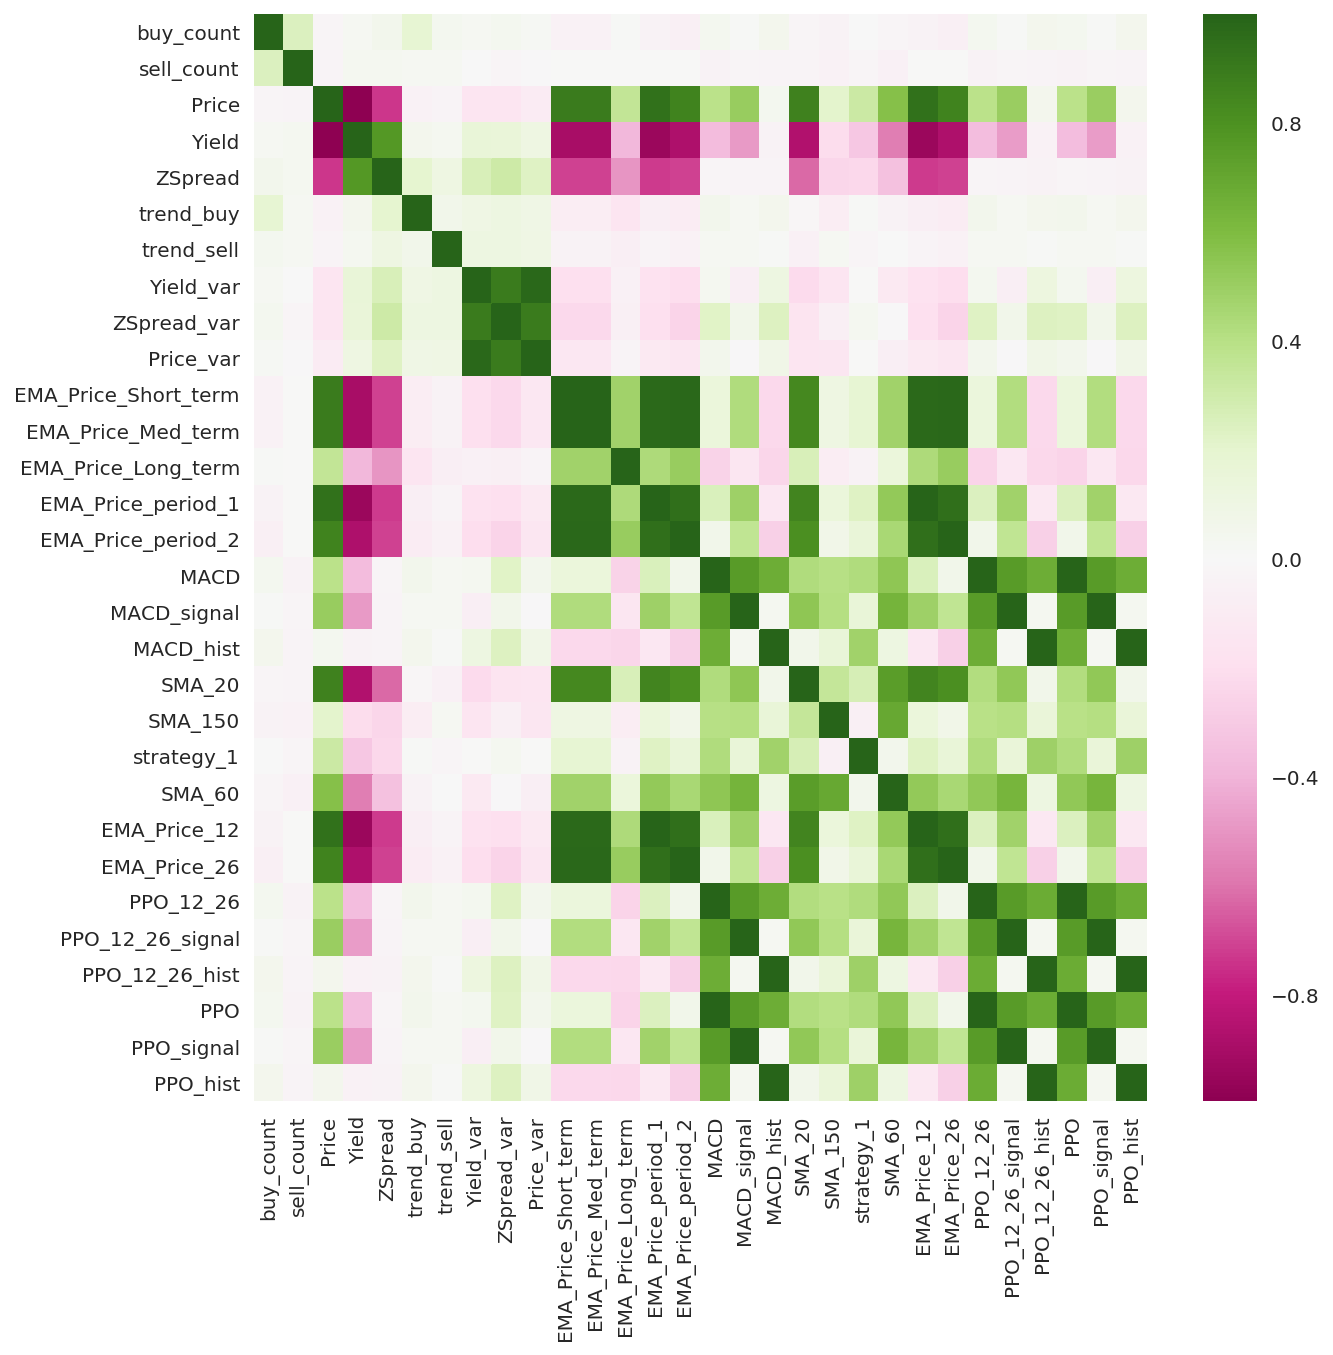

In [795]:
plt.subplots(figsize=(10,10))
sns.heatmap(history_idx_1.fillna(history_idx_1.mean()).corr(), cmap="PiYG")

## Changing currency

In [806]:
isin.columns

Index(['IsinIdx', 'TickerIdx', 'ActualMaturityDateKey', 'IssueDateKey',
       'Seniority', 'Currency', 'ActivityGroup', 'Region', 'Activity',
       'RiskCaptain', 'Owner', 'CompositeRating', 'IndustrySector',
       'IndustrySubgroup', 'MarketIssue', 'IssuedAmount', 'CouponType'],
      dtype='object')

In [820]:
market.columns

Index(['IsinIdx', 'DateKey', 'Price', 'Yield', 'ZSpread'], dtype='object')

In [819]:
isin.tail(5)

,IsinIdx,TickerIdx,ActualMaturityDateKey,IssueDateKey,Seniority,Currency,ActivityGroup,Region,Activity,RiskCaptain,Owner,CompositeRating,IndustrySector,IndustrySubgroup,MarketIssue,IssuedAmount,CouponType
27406,27406,493,20260522,20180522,SEN,EUR,FLOW G10,EUROPE,INSTITUTIONAL MARKET MAKING,HIGH GRADE CORP,TMT/AUTO CASH & PERPS,NR,"Consumer, Cyclical",Auto-Cars/Light Trucks,Euro mtn,750000000.0,FIXED
27407,27407,357,20300522,20180522,SEN,EUR,FLOW G10,EUROPE,INSTITUTIONAL MARKET MAKING,HIGH GRADE CORP,TMT/AUTO CASH & PERPS,NR,Basic Materials,Chemicals-Diversified,Euro-zone,500000000.0,FIXED
27408,27408,357,20250522,20180522,SEN,EUR,FLOW G10,EUROPE,INSTITUTIONAL MARKET MAKING,HIGH GRADE CORP,TMT/AUTO CASH & PERPS,NR,Basic Materials,Chemicals-Diversified,Euro-zone,750000000.0,FIXED
27409,27409,3074,20250522,20180522,SEN,EUR,FLOW G10,EUROPE,INSTITUTIONAL MARKET MAKING,HIGH GRADE CORP,TMT/AUTO CASH & PERPS,NR,"Consumer, Cyclical",Food-Catering,Euro-zone,300000000.0,FIXED
27410,27410,500,20231122,20180522,SEN,EUR,FLOW G10,EUROPE,INSTITUTIONAL MARKET MAKING,FINANCIALS,SENIOR FINS,NR,Financial,Diversified Banking Inst,Euro mtn,700000000.0,FIXED


In [817]:
macro.DateKey.max(), macro.DateKey.min()

(20180511, 20150101)

In [814]:
macro.loc[macro['DateKey'] == 20180522]

,DateKey,SSE,DAX,EUROSTOXX,VSTOXX,FTSE100,HSI,NIKKEI,DOWJONES_INDU,SP500,VIX,FX_USD.ARS,FX_USD.AUD,FX_USD.BRL,FX_USD.CAD,FX_USD.CHF,FX_USD.CNO,FX_USD.CNY,FX_USD.EUR,FX_USD.GBP,FX_USD.HKD,FX_USD.IDR,FX_USD.JPY,FX_USD.NOK,FX_USD.SGD,FX_USD.TRY,FX_USD.ZAR,MoneyMarket_ARS3M,MoneyMarket_AUD3M,MoneyMarket_CAD3M,MoneyMarket_CHF3M,MoneyMarket_CNO3M,MoneyMarket_CNY3M,MoneyMarket_EUR3M,MoneyMarket_GBP3M,MoneyMarket_HKD3M,MoneyMarket_IDR3M,MoneyMarket_JPY3M,MoneyMarket_NOK3M,MoneyMarket_SGD3M,MoneyMarket_TRY3M,MoneyMarket_USD3M,MoneyMarket_ZAR3M,Swap_ARS10Y,Swap_ARS2Y,Swap_ARS5Y,Swap_AUD10Y,Swap_AUD2Y,Swap_AUD30Y,Swap_AUD5Y,Swap_BRL10Y,Swap_BRL2Y,Swap_BRL5Y,Swap_CAD10Y,Swap_CAD2Y,Swap_CAD30Y,Swap_CAD5Y,Swap_CHF10Y,Swap_CHF2Y,Swap_CHF30Y,Swap_CHF5Y,Swap_CNH10Y,Swap_CNH2Y,Swap_CNH30Y,Swap_CNH5Y,Swap_CNO10Y,Swap_CNO2Y,Swap_CNO30Y,Swap_CNO5Y,Swap_CNY10Y,Swap_CNY2Y,Swap_CNY30Y,Swap_CNY5Y,Swap_EUR10Y,Swap_EUR2Y,Swap_EUR30Y,Swap_EUR5Y,Swap_GBP10Y,Swap_GBP2Y,Swap_GBP30Y,Swap_GBP5Y,Swap_HKD10Y,Swap_HKD2Y,Swap_HKD30Y,Swap_HKD5Y,Swap_IDR10Y,Swap_IDR2Y,Swap_IDR30Y,Swap_IDR5Y,Swap_JPY10Y,Swap_JPY2Y,Swap_JPY30Y,Swap_JPY5Y,Swap_NOK10Y,Swap_NOK2Y,Swap_NOK30Y,Swap_NOK5Y,Swap_SGD10Y,Swap_SGD2Y,Swap_SGD30Y,Swap_SGD5Y,Swap_TRY10Y,Swap_TRY2Y,Swap_TRY5Y,Swap_USD10Y,Swap_USD2Y,Swap_USD30Y,Swap_USD5Y,Swap_ZAR10Y,Swap_ZAR2Y,Swap_ZAR30Y,Swap_ZAR5Y


In [ ]:
def changing_currency(df, macro):
    """
        This function create a column with prices in dollar
    """
    df['converted_currency'] = np.nan
    for ix, row in df.iterrows():
        if row.Currency == 'USD':
            continue
        temp = row.IssuedAmount * macro.loc[]
        df.set_value(ix, 'converted_currency')